<a href="https://colab.research.google.com/github/sc7-cloud/TFG---GOOGLE-COLAB-C-DIGOS-/blob/main/ANALISIS_DE_NEGOCIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


df_artistas = pd.read_excel('/content/Artistas.xlsx')
df_canciones = pd.read_excel('/content/Canciones.xlsx')


print("Primeras filas de la base de datos de Artistas:")
print(df_artistas.head())
print("\nPrimeras filas de la base de datos de Canciones:")
print(df_canciones.head())


df_combinado = pd.merge(df_artistas, df_canciones, on="Artista ID", how="inner")


print("\nPrimeras filas del DataFrame combinado:")
print(df_combinado.head())


df_combinado['Artista ID'] = df_combinado['Artista ID'].astype('category')



print("\nPrimeras filas después de convertir los identificadores a categóricos:")
print(df_combinado[['Artista ID']].dtypes)


Primeras filas de la base de datos de Artistas:
   Chartmetric ID         Artista  Artista ID            País          Región  \
0         1404155      Lola Young        1001     Reino Unido  Western Europe   
1          470449   Playboi Carti        1002  Estados Unidos   North America   
2            2007            Akon        1003         Senegal  Western Africa   
3            3544  Ellie Goulding        1004     Reino Unido  Western Europe   
4         1202489          GIVĒON        1005  Estados Unidos   North America   

      Continente      Solista/Grupo     Género 1    Género 2   Género 3  ...  \
0         Europe              Grupo          R&B    Folk Pop      Indie  ...   
1  North America  Artistas solistas  Hip-Hop/Rap     Pop Rap   Rage Rap  ...   
2         Africa  Artistas solistas  Hip-Hop/Rap         Pop   R&B/Soul  ...   
3         Europe  Artistas solistas   Electronic  Electropop  Indie Pop  ...   
4  North America  Artistas solistas          R&B         Pop   Ne


Generando la gráfica de correlación...


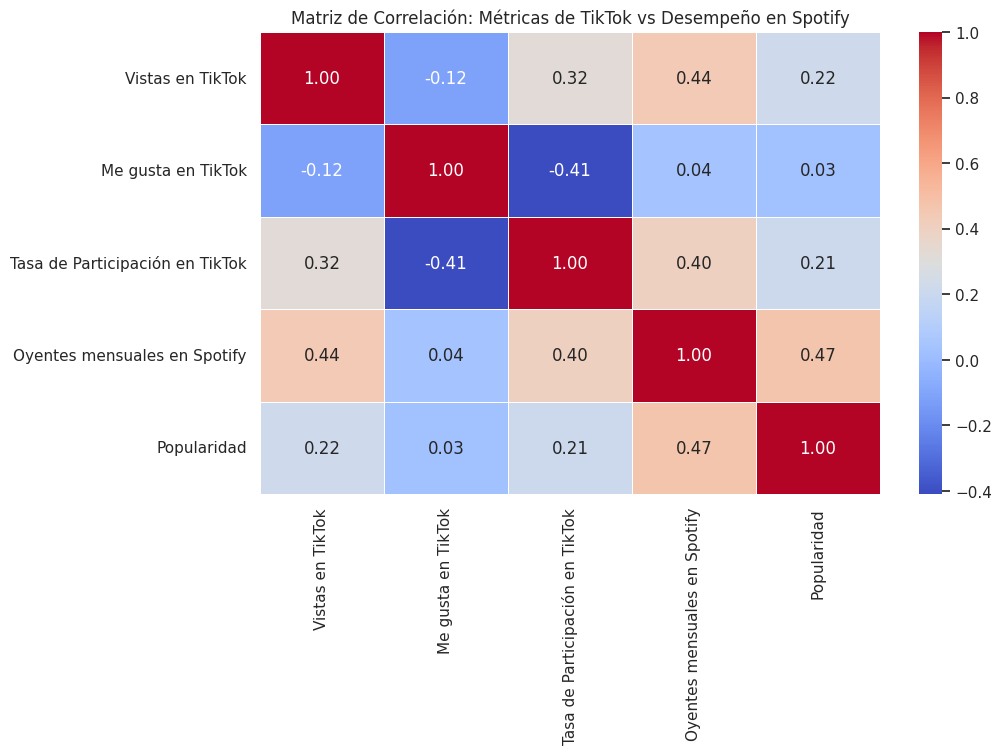

In [ ]:

def grafica_correlacion():
    print("\nGenerando la gráfica de correlación...")

    corr_matrix = df_combinado[['Vistas en TikTok', 'Me gusta en TikTok', 'Tasa de Participación en TikTok', 'Oyentes mensuales en Spotify', 'Popularidad']].corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Matriz de Correlación: Métricas de TikTok vs Desempeño en Spotify")
    plt.show()

grafica_correlacion()


Generando gráfico de Bailabilidad y Energía vs Oyentes Mensuales en Spotify...


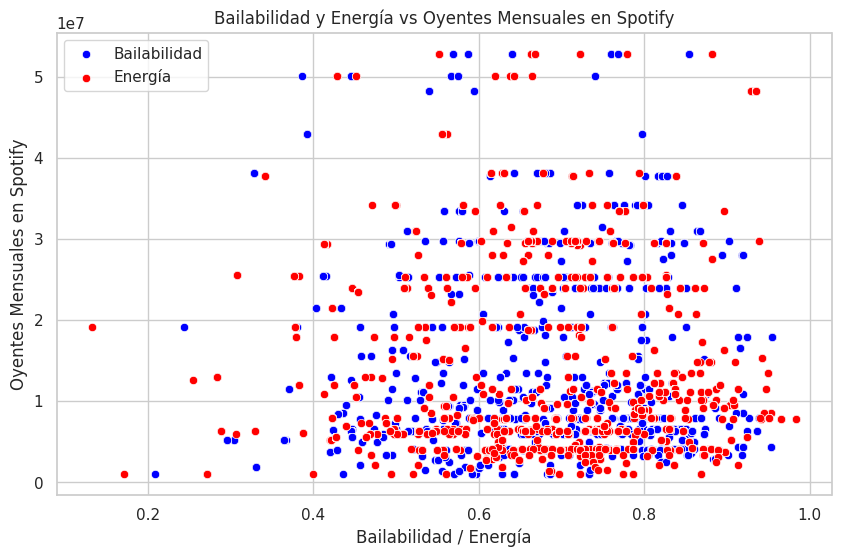

In [ ]:

def grafica_caracteristicas_musicales():
    print("\nGenerando gráfico de Bailabilidad y Energía vs Oyentes Mensuales en Spotify...")

    if 'Bailabilidad' in df_combinado.columns and 'Energía' in df_combinado.columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='Bailabilidad', y='Oyentes mensuales en Spotify', data=df_combinado, color='blue', label='Bailabilidad')
        sns.scatterplot(x='Energía', y='Oyentes mensuales en Spotify', data=df_combinado, color='red', label='Energía')
        plt.title("Bailabilidad y Energía vs Oyentes Mensuales en Spotify")
        plt.xlabel("Bailabilidad / Energía")
        plt.ylabel("Oyentes Mensuales en Spotify")
        plt.legend()
        plt.show()


grafica_caracteristicas_musicales()


Generando gráfico de Bailabilidad vs Oyentes Mensuales con ajuste de línea de regresión...


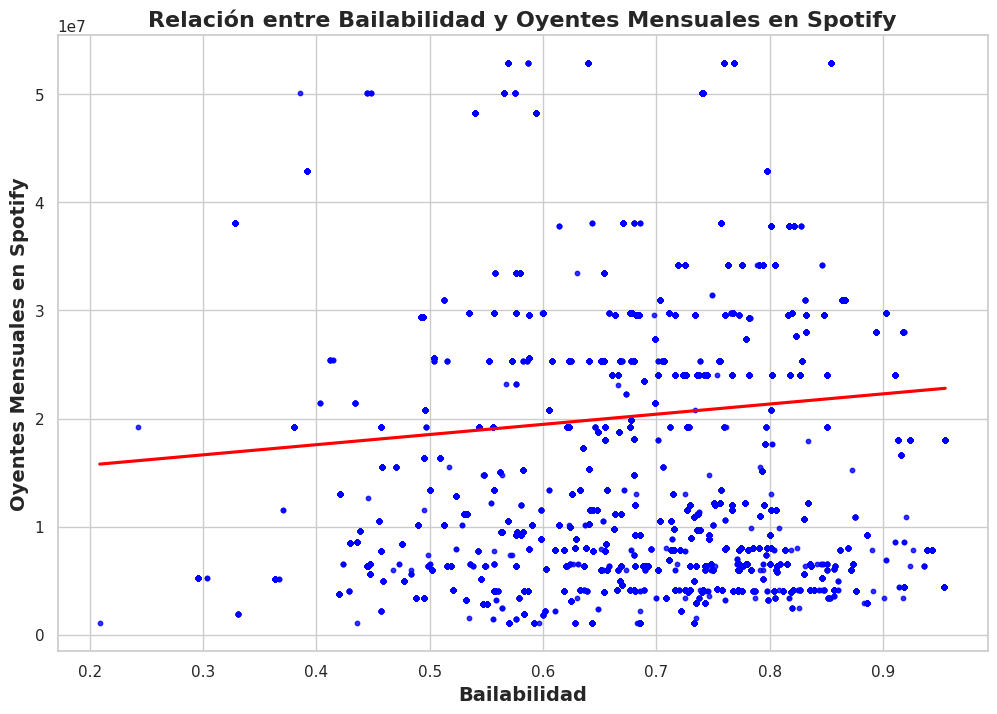


Generando gráfico de Energía vs Oyentes Mensuales con ajuste de línea de regresión...


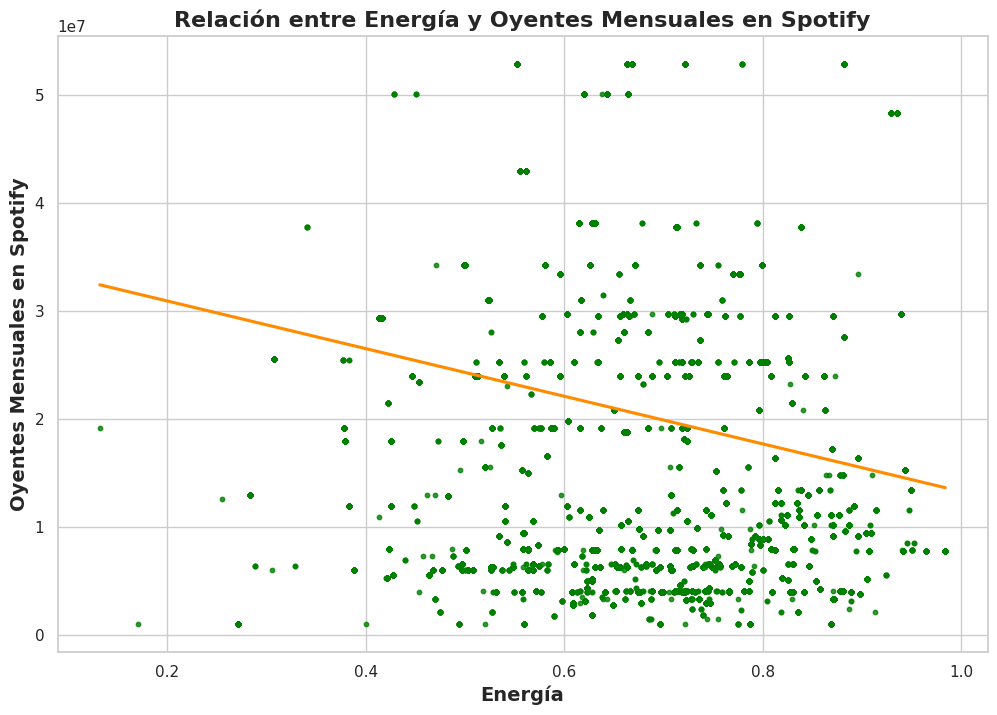


Generando gráfico de Boxplot para comparar características musicales...


<ipython-input-43-ea27242e080b>:57: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




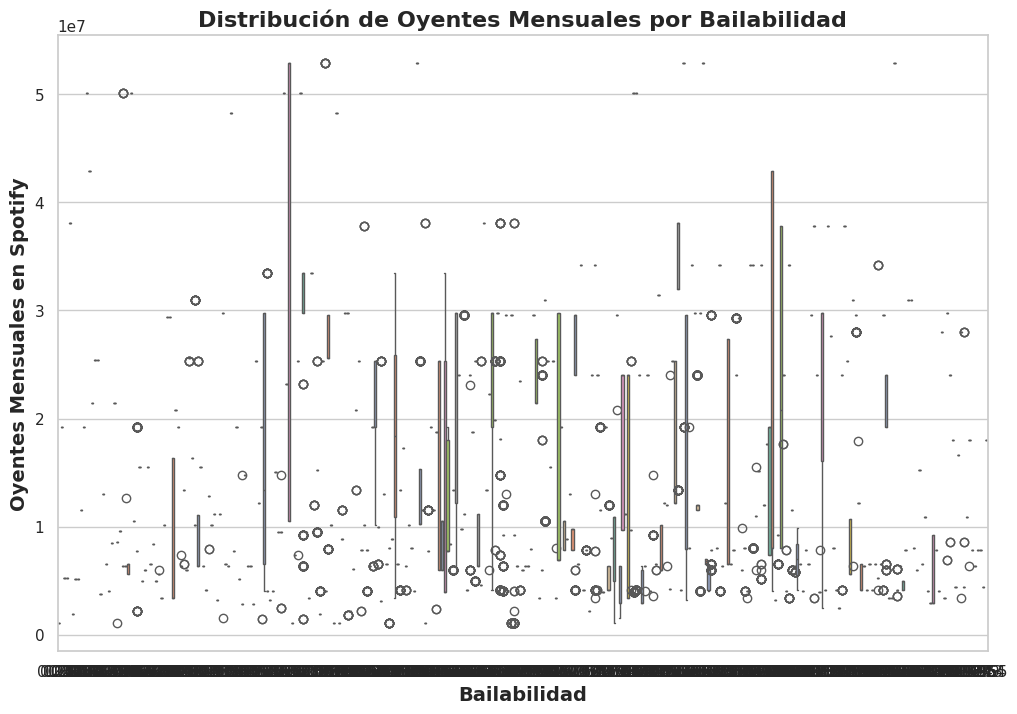

<ipython-input-43-ea27242e080b>:64: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




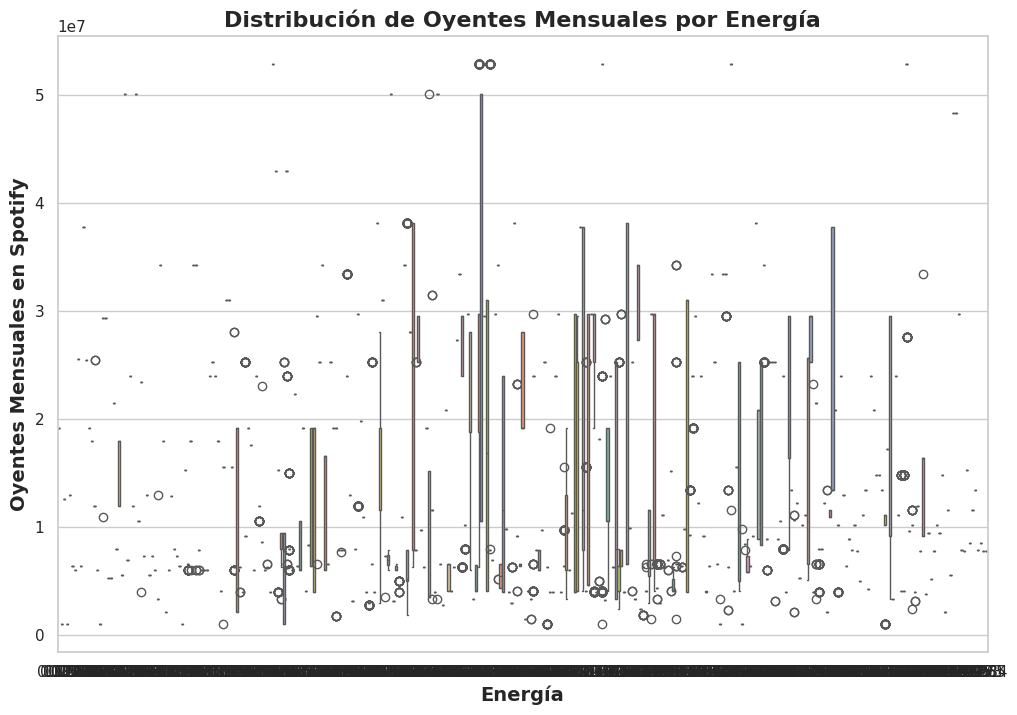

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd


sns.set(style="whitegrid")


def grafica_bailabilidad_vs_oyentes():
    print("\nGenerando gráfico de Bailabilidad vs Oyentes Mensuales con ajuste de línea de regresión...")


    if 'Bailabilidad' in df_combinado.columns and 'Oyentes mensuales en Spotify' in df_combinado.columns:

        plt.figure(figsize=(12, 8))


        sns.regplot(x='Bailabilidad', y='Oyentes mensuales en Spotify', data=df_combinado, scatter_kws={'color':'blue', 's':10}, line_kws={'color':'red'}, ci=None)


        plt.title('Relación entre Bailabilidad y Oyentes Mensuales en Spotify', fontsize=16, fontweight='bold')
        plt.xlabel('Bailabilidad', fontsize=14, fontweight='bold')
        plt.ylabel('Oyentes Mensuales en Spotify', fontsize=14, fontweight='bold')


        plt.show()


def grafica_energia_vs_oyentes():
    print("\nGenerando gráfico de Energía vs Oyentes Mensuales con ajuste de línea de regresión...")

    if 'Energía' in df_combinado.columns and 'Oyentes mensuales en Spotify' in df_combinado.columns:

        plt.figure(figsize=(12, 8))


        sns.regplot(x='Energía', y='Oyentes mensuales en Spotify', data=df_combinado, scatter_kws={'color':'green', 's':10}, line_kws={'color':'darkorange'}, ci=None)


        plt.title('Relación entre Energía y Oyentes Mensuales en Spotify', fontsize=16, fontweight='bold')
        plt.xlabel('Energía', fontsize=14, fontweight='bold')
        plt.ylabel('Oyentes Mensuales en Spotify', fontsize=14, fontweight='bold')


        plt.show()


def grafica_boxplot_caracteristicas():
    print("\nGenerando gráfico de Boxplot para comparar características musicales...")


    if 'Bailabilidad' in df_combinado.columns and 'Energía' in df_combinado.columns and 'Oyentes mensuales en Spotify' in df_combinado.columns:


        plt.figure(figsize=(12, 8))
        sns.boxplot(x='Bailabilidad', y='Oyentes mensuales en Spotify', data=df_combinado, palette='Set2')
        plt.title("Distribución de Oyentes Mensuales por Bailabilidad", fontsize=16, fontweight='bold')
        plt.xlabel("Bailabilidad", fontsize=14, fontweight='bold')
        plt.ylabel("Oyentes Mensuales en Spotify", fontsize=14, fontweight='bold')
        plt.show()

        plt.figure(figsize=(12, 8))
        sns.boxplot(x='Energía', y='Oyentes mensuales en Spotify', data=df_combinado, palette='Set2')
        plt.title("Distribución de Oyentes Mensuales por Energía", fontsize=16, fontweight='bold')
        plt.xlabel("Energía", fontsize=14, fontweight='bold')
        plt.ylabel("Oyentes Mensuales en Spotify", fontsize=14, fontweight='bold')
        plt.show()


grafica_bailabilidad_vs_oyentes()
grafica_energia_vs_oyentes()
grafica_boxplot_caracteristicas()



Generando gráfico de Bailabilidad vs Oyentes Mensuales en Spotify...


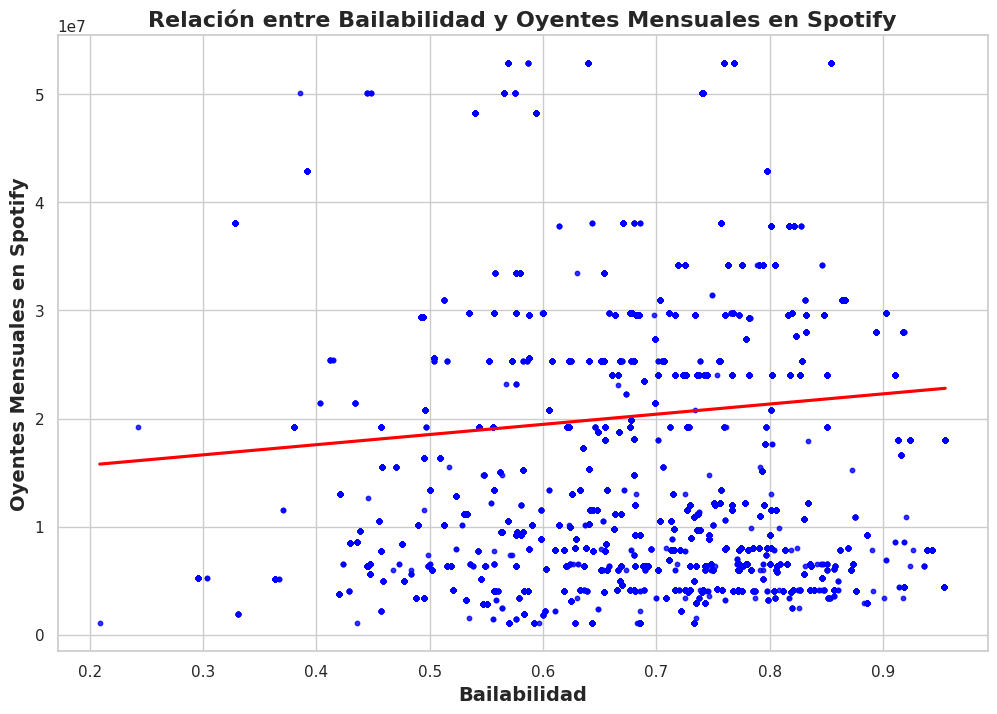


Generando gráfico de Bailabilidad vs Popularidad...


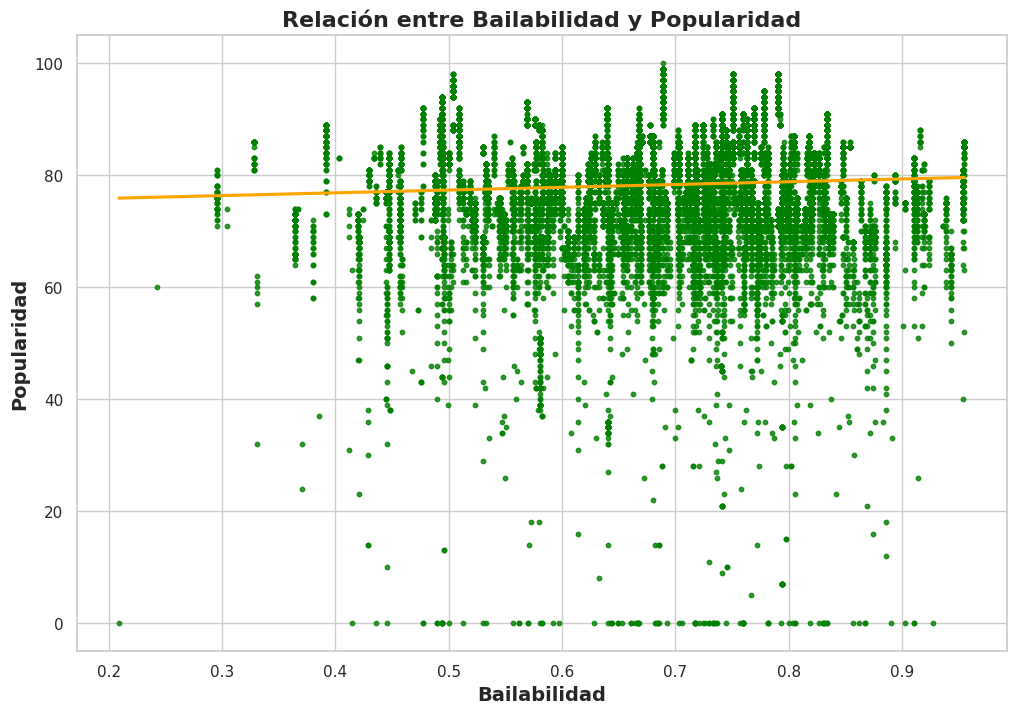


Generando gráfico de Energía vs Oyentes Mensuales en Spotify...


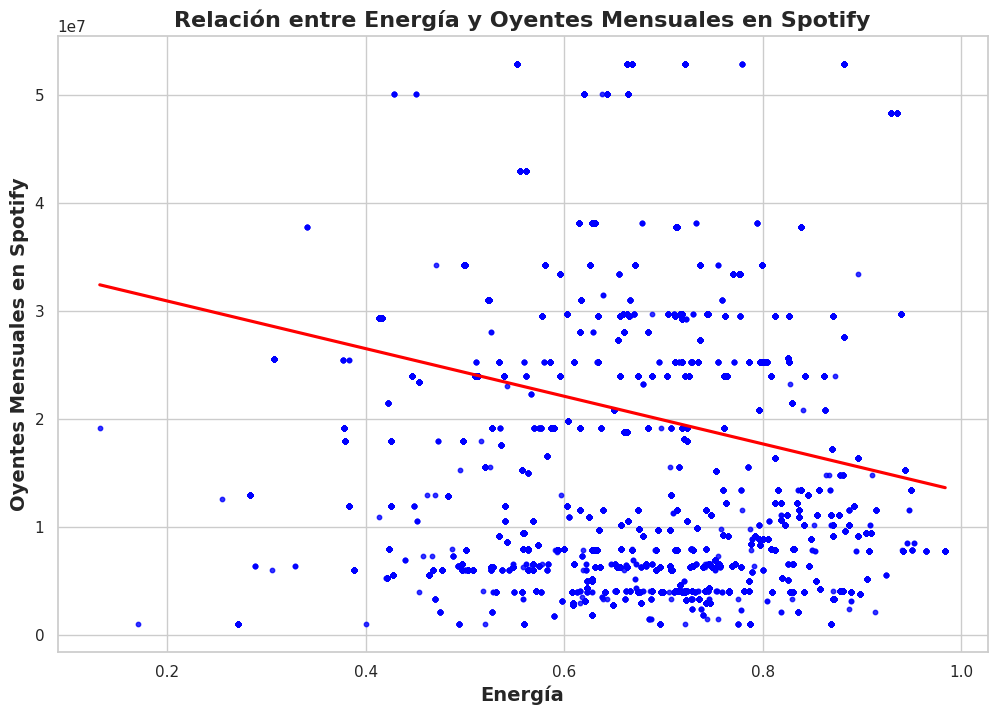


Generando gráfico de Energía vs Popularidad...


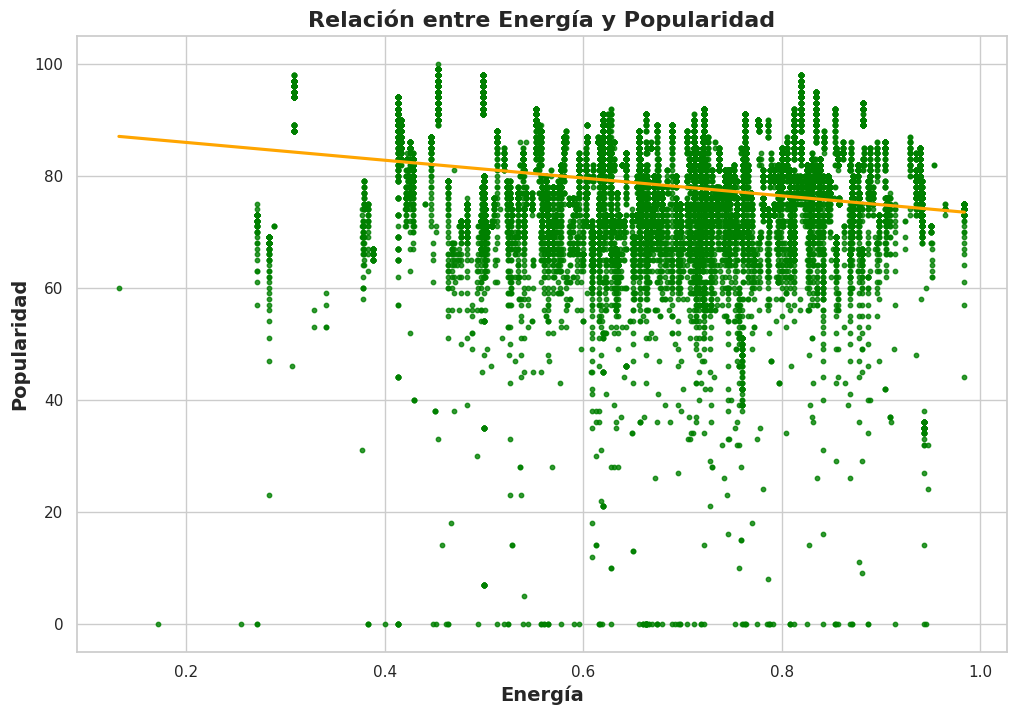


Generando gráfico de Acústica vs Oyentes Mensuales en Spotify...


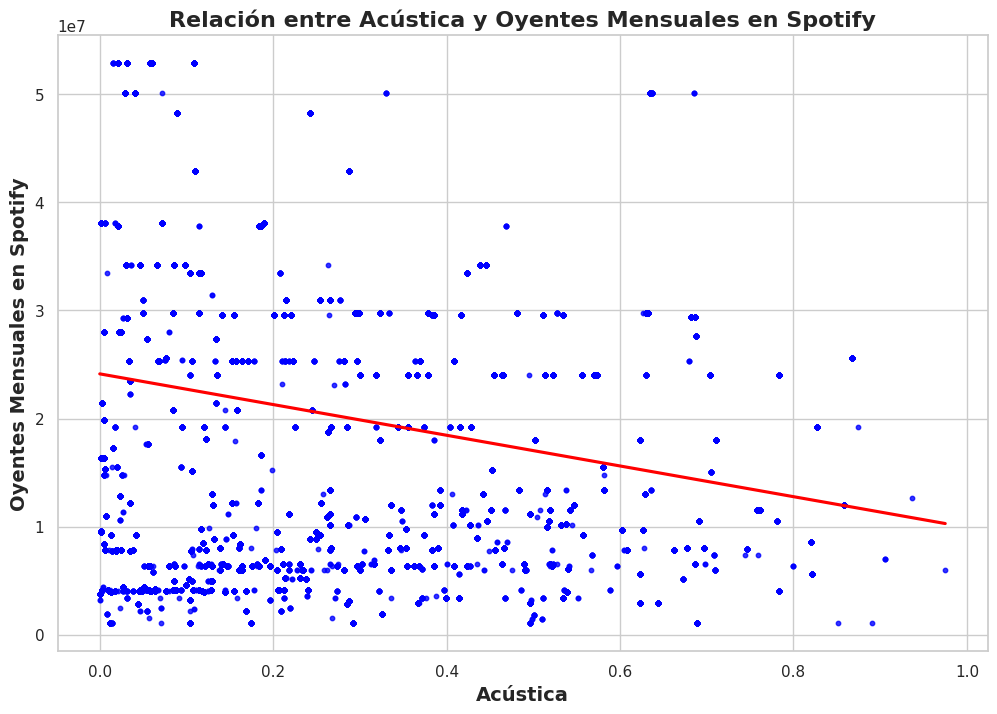


Generando gráfico de Acústica vs Popularidad...


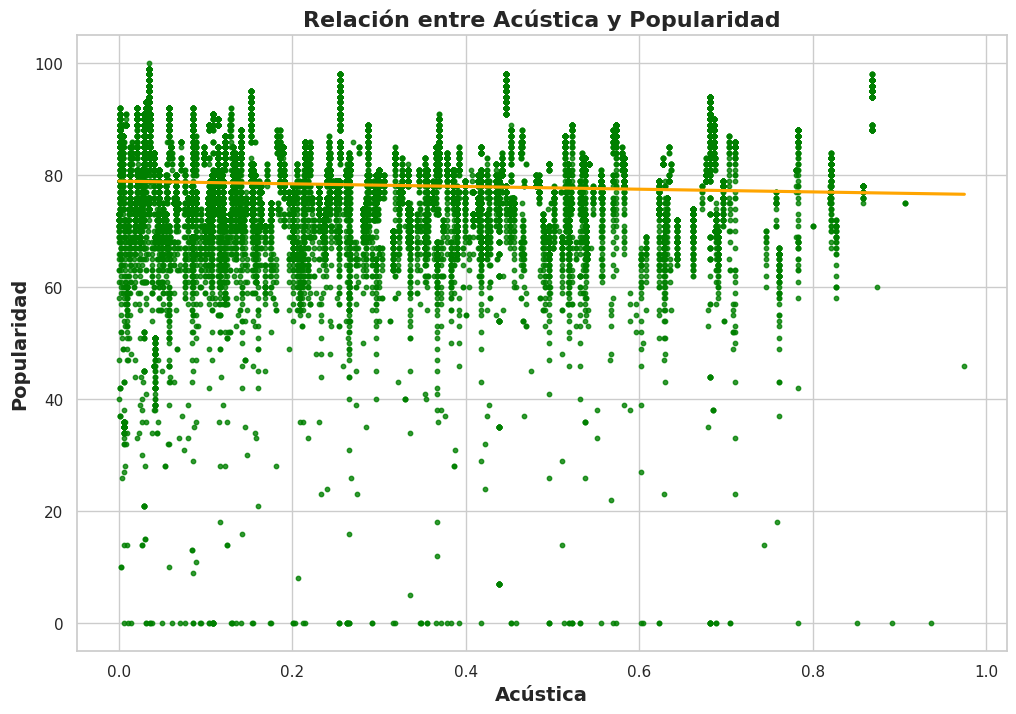


Generando gráfico de Tono vs Oyentes Mensuales en Spotify...


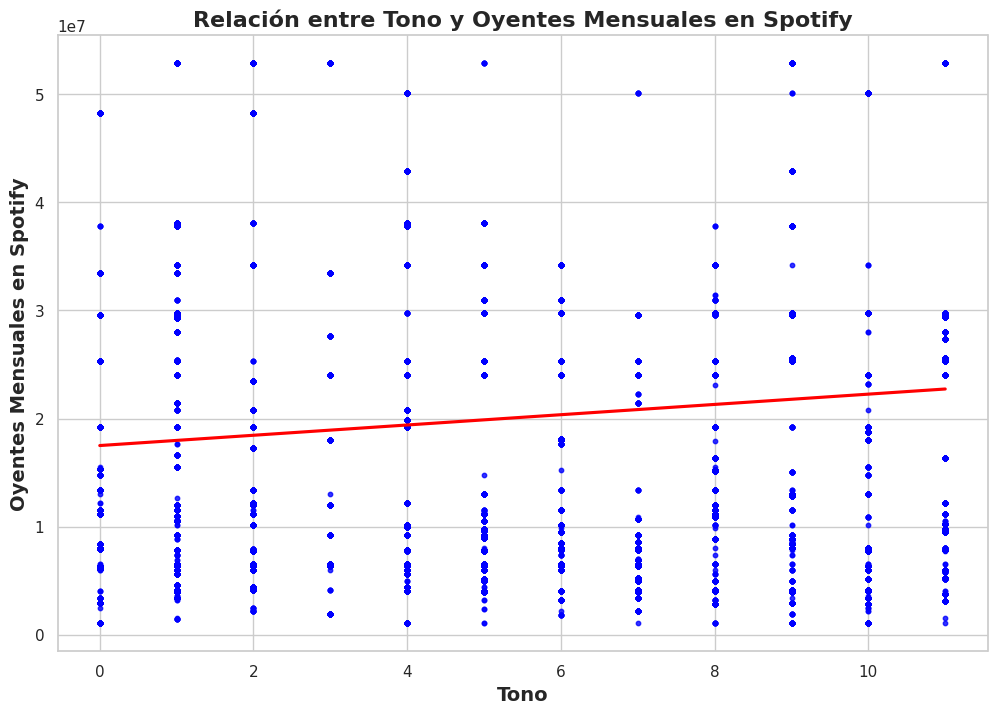


Generando gráfico de Tono vs Popularidad...


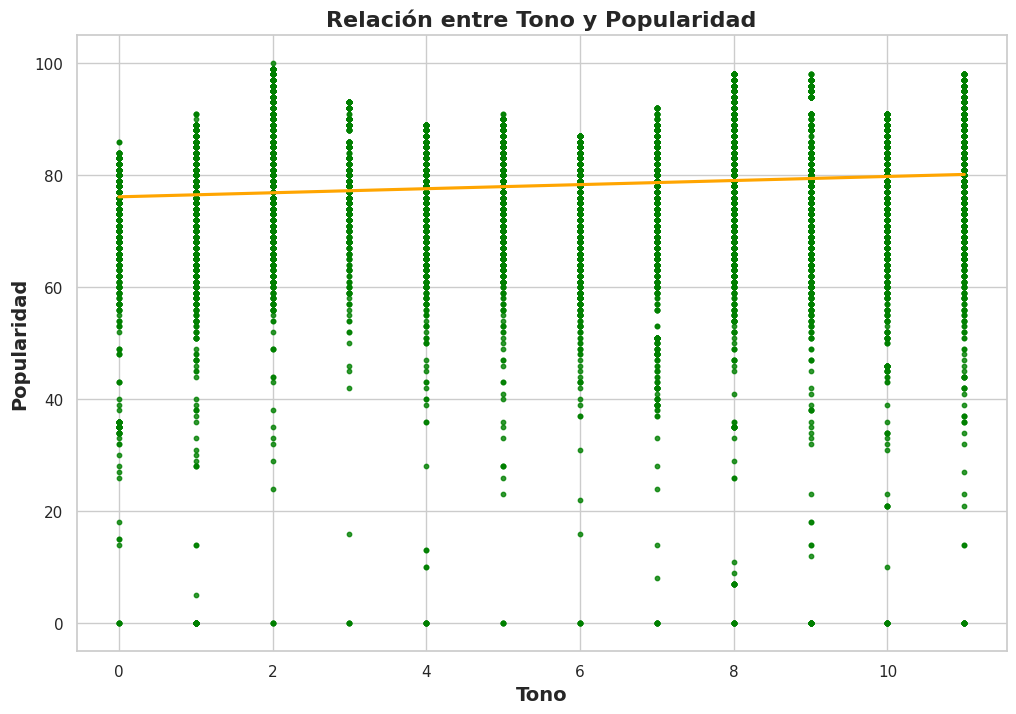


Generando gráfico de Instrumentalidad vs Oyentes Mensuales en Spotify...


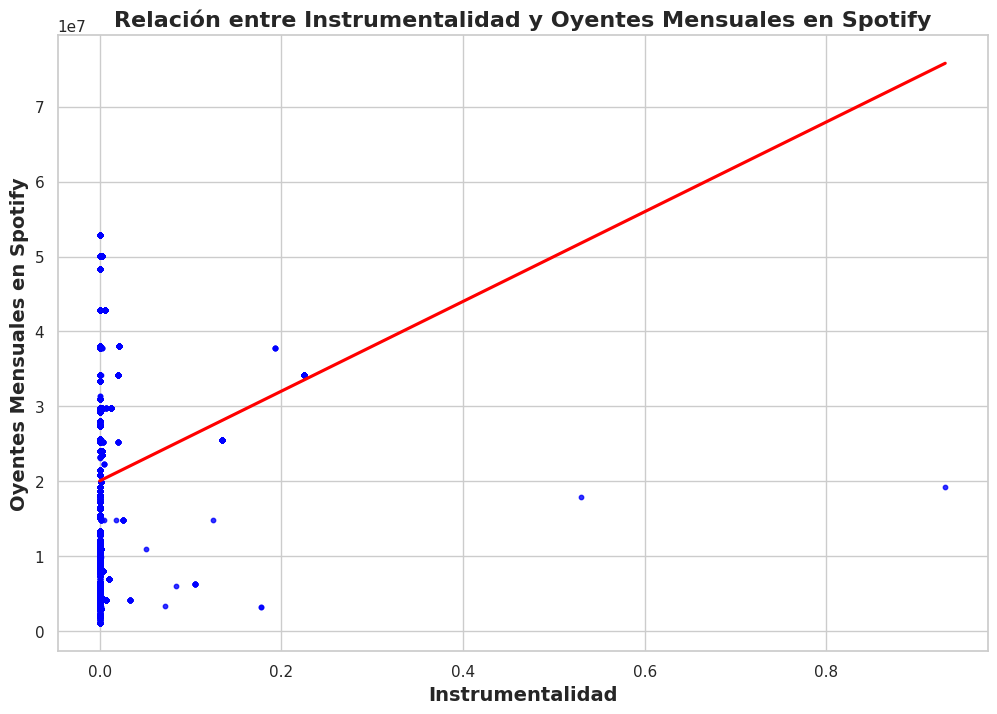


Generando gráfico de Instrumentalidad vs Popularidad...


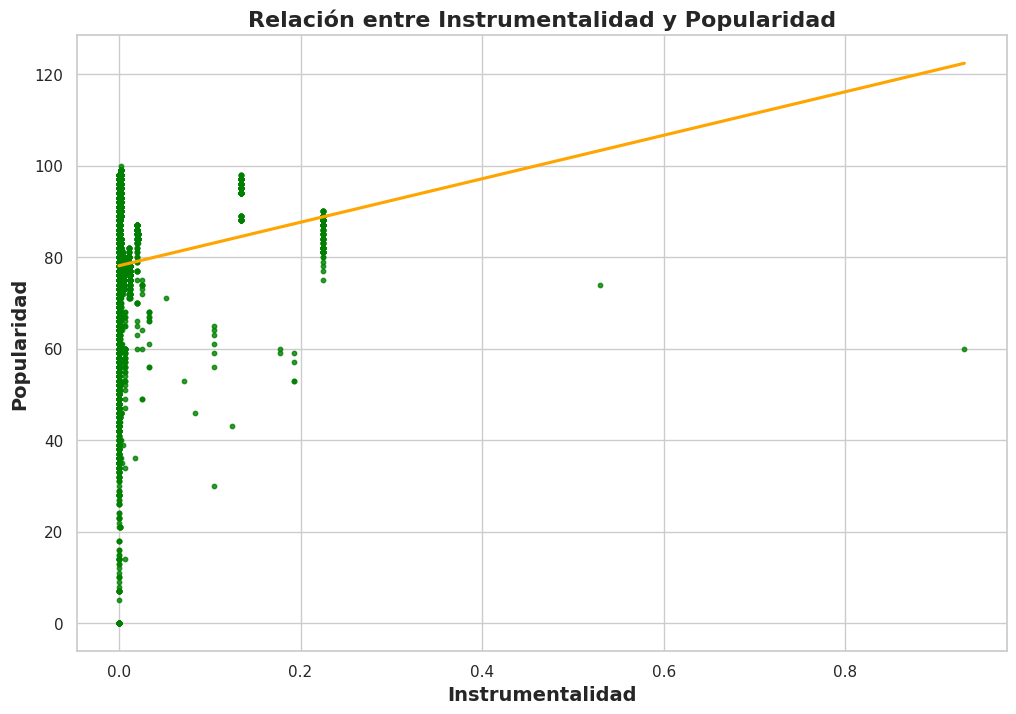


Generando gráfico de Tempo vs Oyentes Mensuales en Spotify...


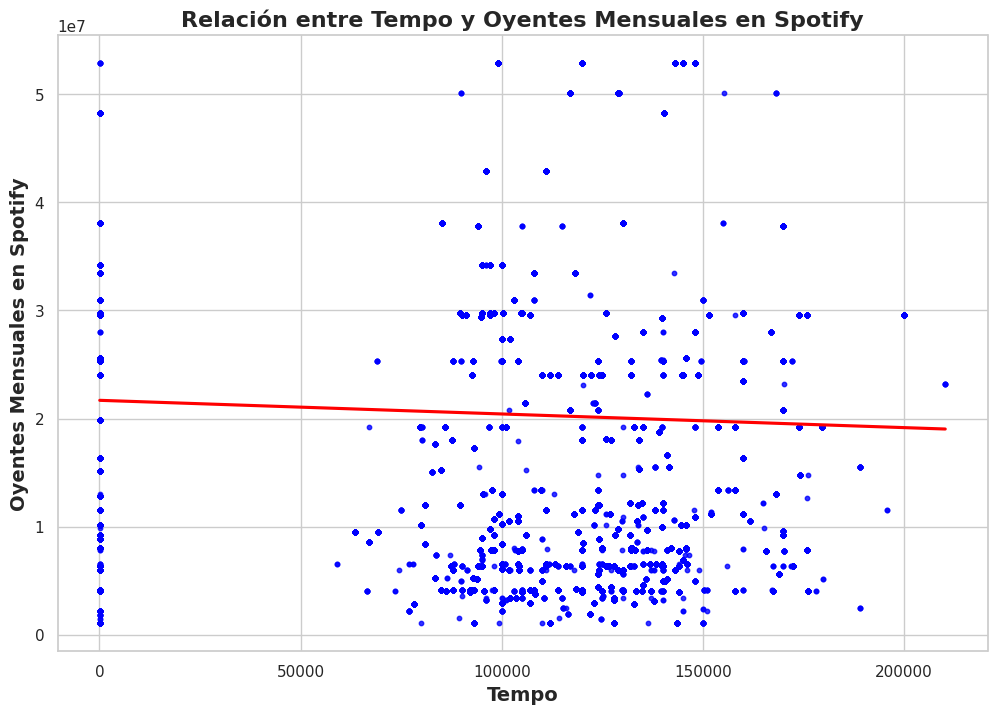


Generando gráfico de Tempo vs Popularidad...


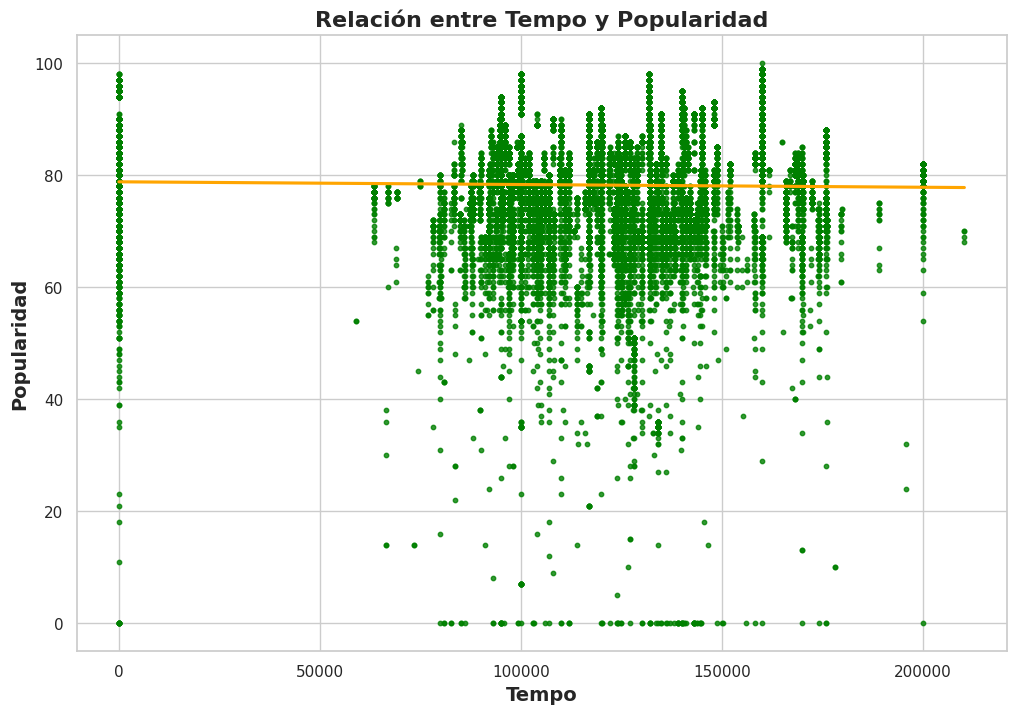


Generando gráfico de Duración vs Oyentes Mensuales en Spotify...


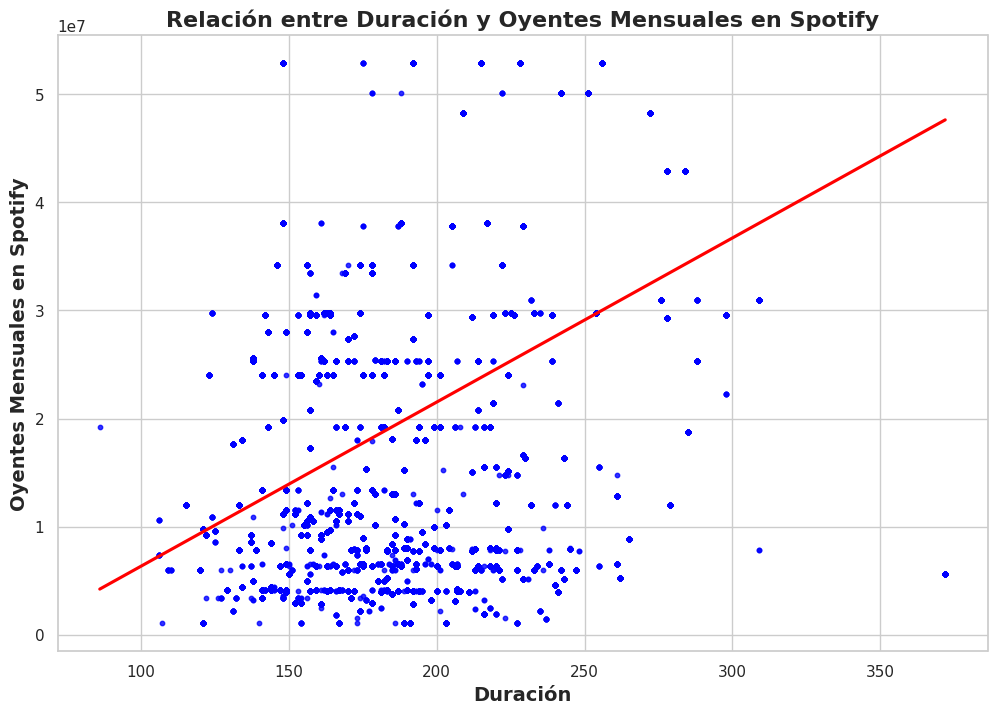


Generando gráfico de Duración vs Popularidad...


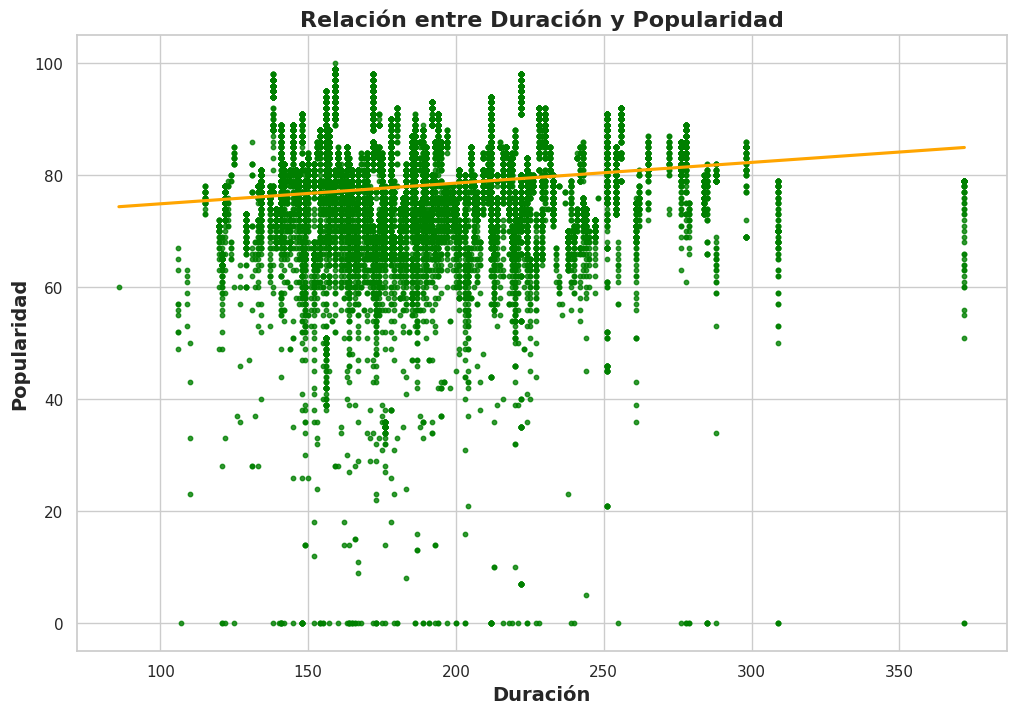

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")


def analizar_impacto_variable(variable, variable_nombre):
    """
    Analiza el impacto de una variable (ej. Bailabilidad, Energía) en Oyentes Mensuales y Popularidad.
    Muestra gráfico de dispersión y ajuste de línea de regresión.
    """
    print(f"\nGenerando gráfico de {variable_nombre} vs Oyentes Mensuales en Spotify...")


    if variable in df_combinado.columns and 'Oyentes mensuales en Spotify' in df_combinado.columns:


        plt.figure(figsize=(12, 8))
        sns.regplot(x=variable, y='Oyentes mensuales en Spotify', data=df_combinado, scatter_kws={'color':'blue', 's':10}, line_kws={'color':'red'}, ci=None)


        plt.title(f'Relación entre {variable_nombre} y Oyentes Mensuales en Spotify', fontsize=16, fontweight='bold')
        plt.xlabel(variable_nombre, fontsize=14, fontweight='bold')
        plt.ylabel('Oyentes Mensuales en Spotify', fontsize=14, fontweight='bold')


        plt.show()


        print(f"\nGenerando gráfico de {variable_nombre} vs Popularidad...")
        plt.figure(figsize=(12, 8))
        sns.regplot(x=variable, y='Popularidad', data=df_combinado, scatter_kws={'color':'green', 's':10}, line_kws={'color':'orange'}, ci=None)


        plt.title(f'Relación entre {variable_nombre} y Popularidad', fontsize=16, fontweight='bold')
        plt.xlabel(variable_nombre, fontsize=14, fontweight='bold')
        plt.ylabel('Popularidad', fontsize=14, fontweight='bold')


        plt.show()


analizar_impacto_variable('Bailabilidad', 'Bailabilidad')


analizar_impacto_variable('Energía', 'Energía')


analizar_impacto_variable('Acústica', 'Acústica')


analizar_impacto_variable('Tono', 'Tono')


analizar_impacto_variable('Instrumentalidad', 'Instrumentalidad')


analizar_impacto_variable('Tempo', 'Tempo')


analizar_impacto_variable('Duración sg', 'Duración')



Generando gráficos de Bailabilidad vs Oyentes Mensuales en Spotify y Popularidad...


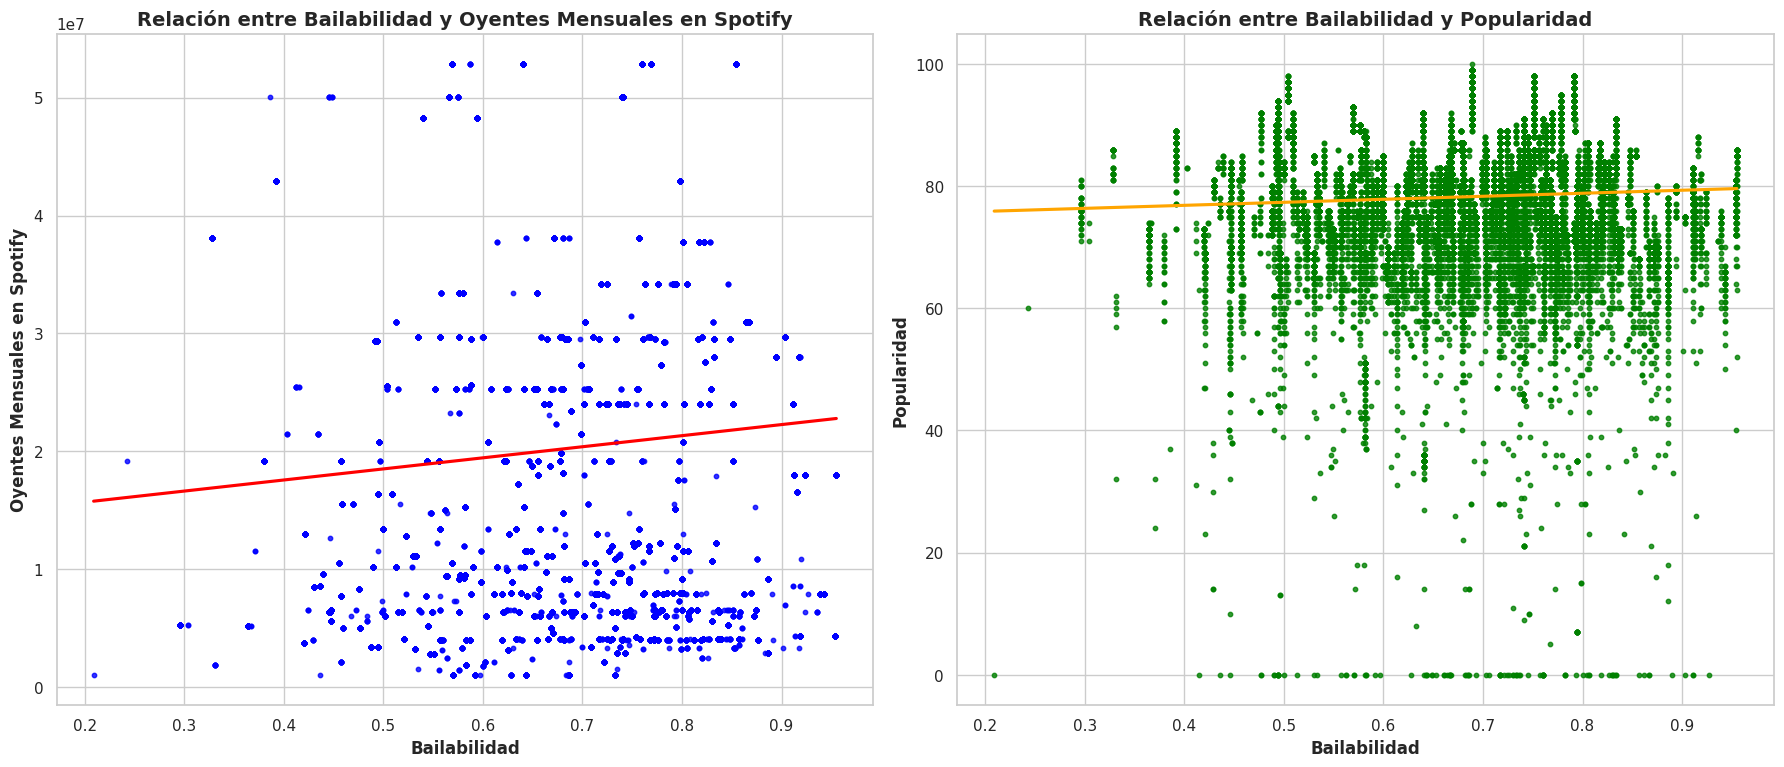


Generando gráficos de Energía vs Oyentes Mensuales en Spotify y Popularidad...


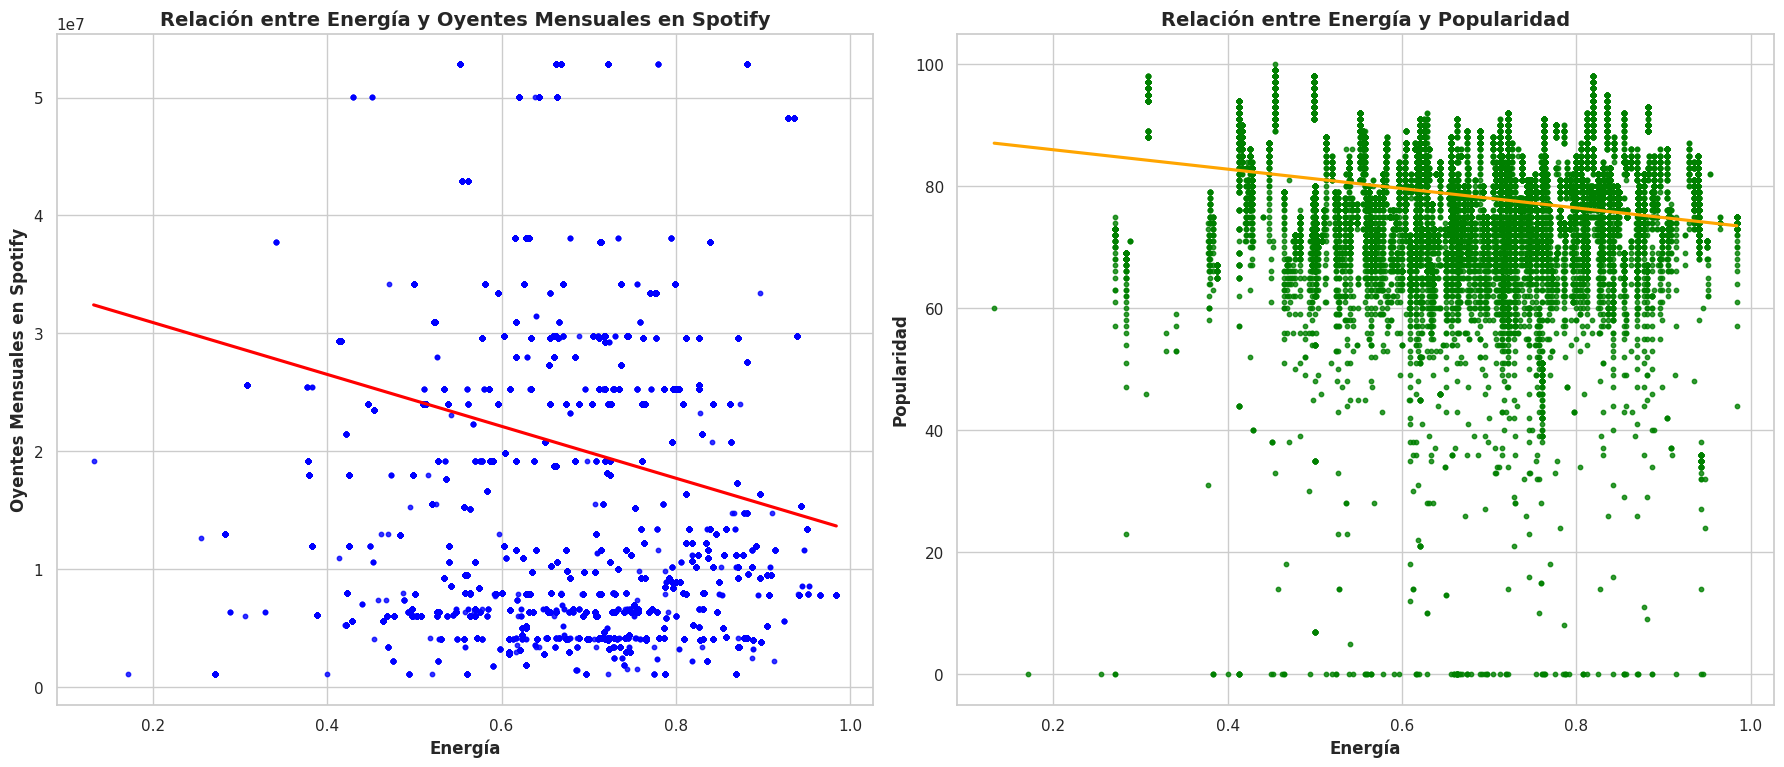


Generando gráficos de Acústica vs Oyentes Mensuales en Spotify y Popularidad...


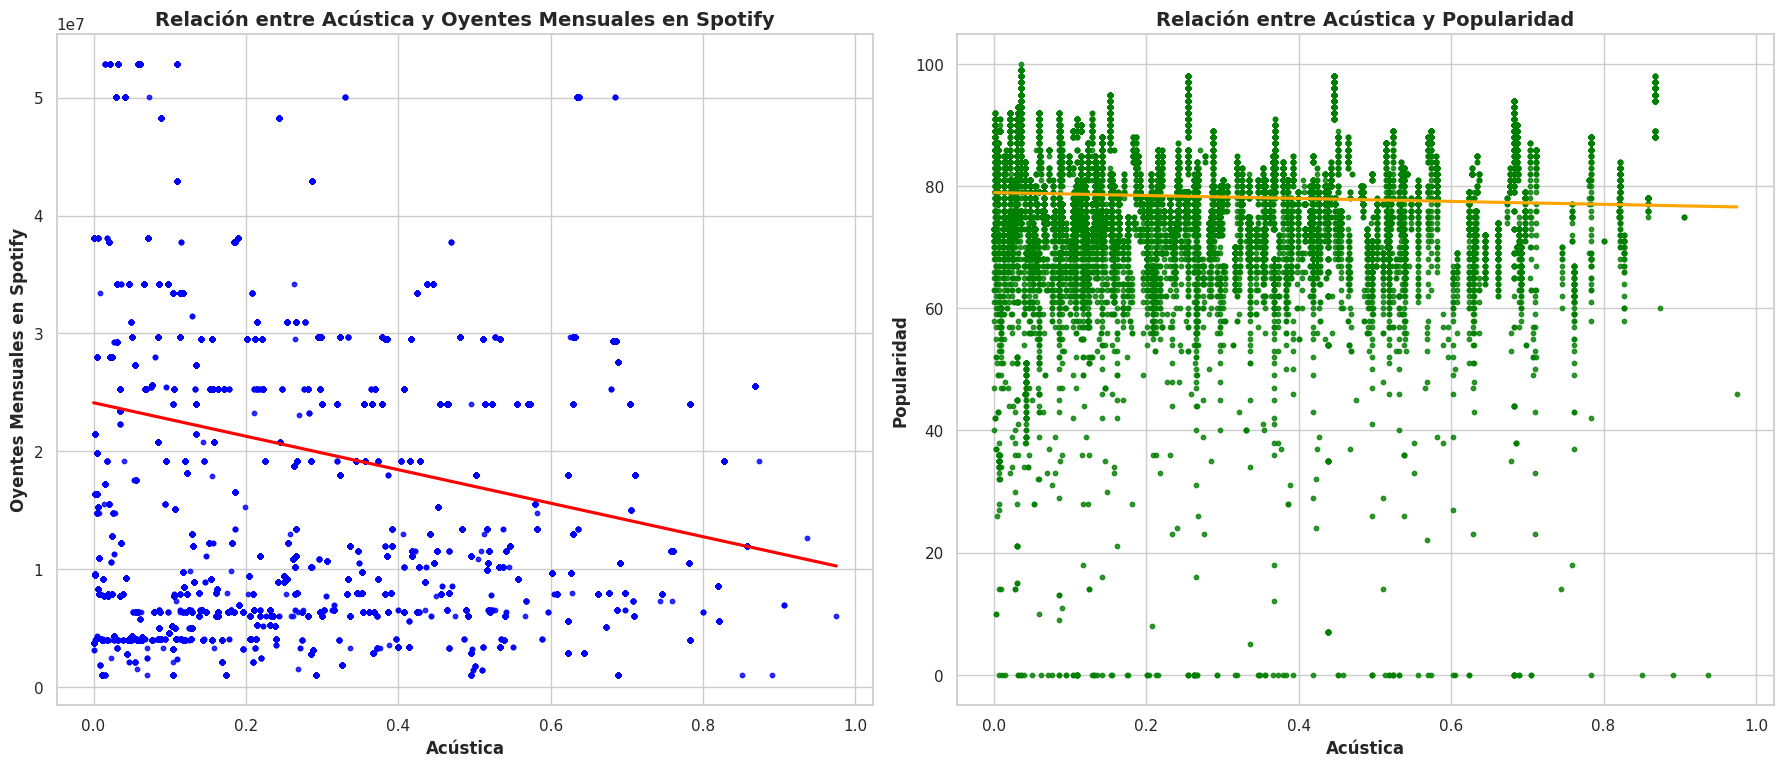


Generando gráficos de Tono vs Oyentes Mensuales en Spotify y Popularidad...


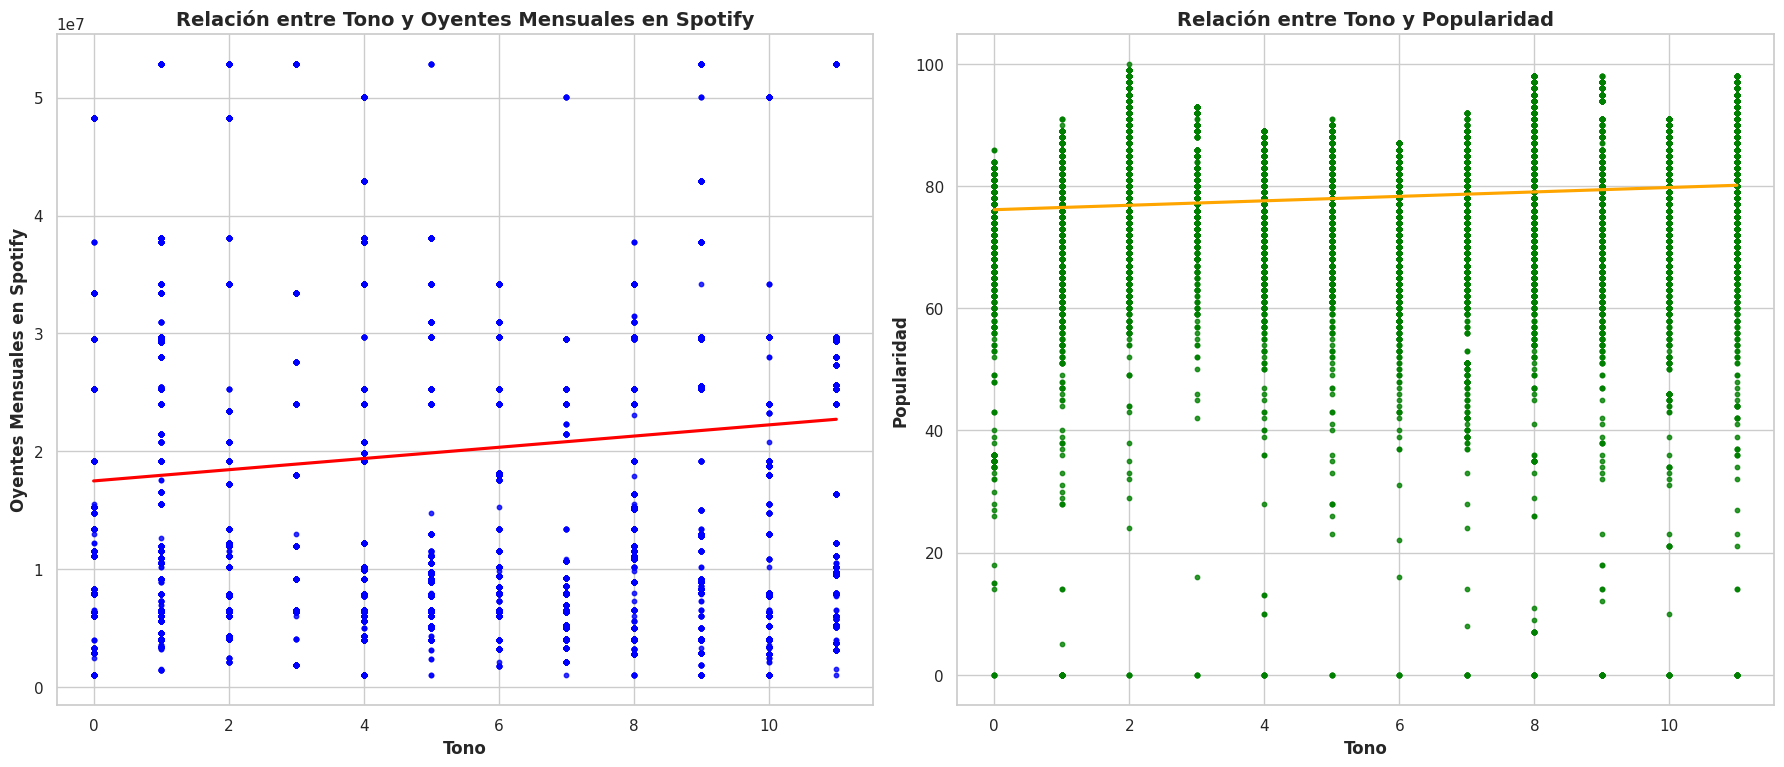


Generando gráficos de Instrumentalidad vs Oyentes Mensuales en Spotify y Popularidad...


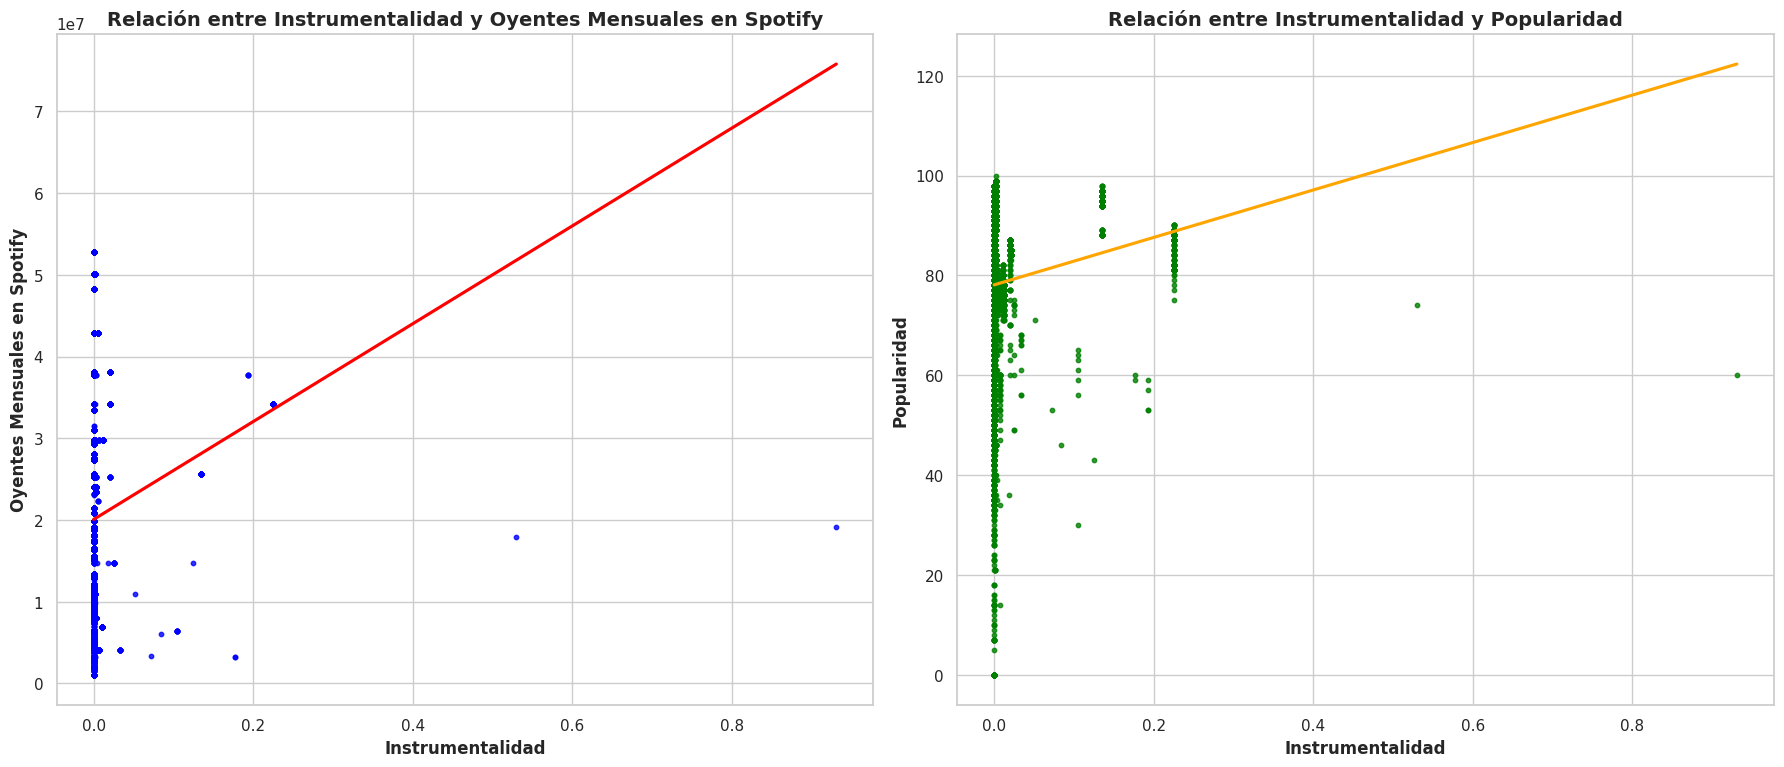


Generando gráficos de Tempo vs Oyentes Mensuales en Spotify y Popularidad...


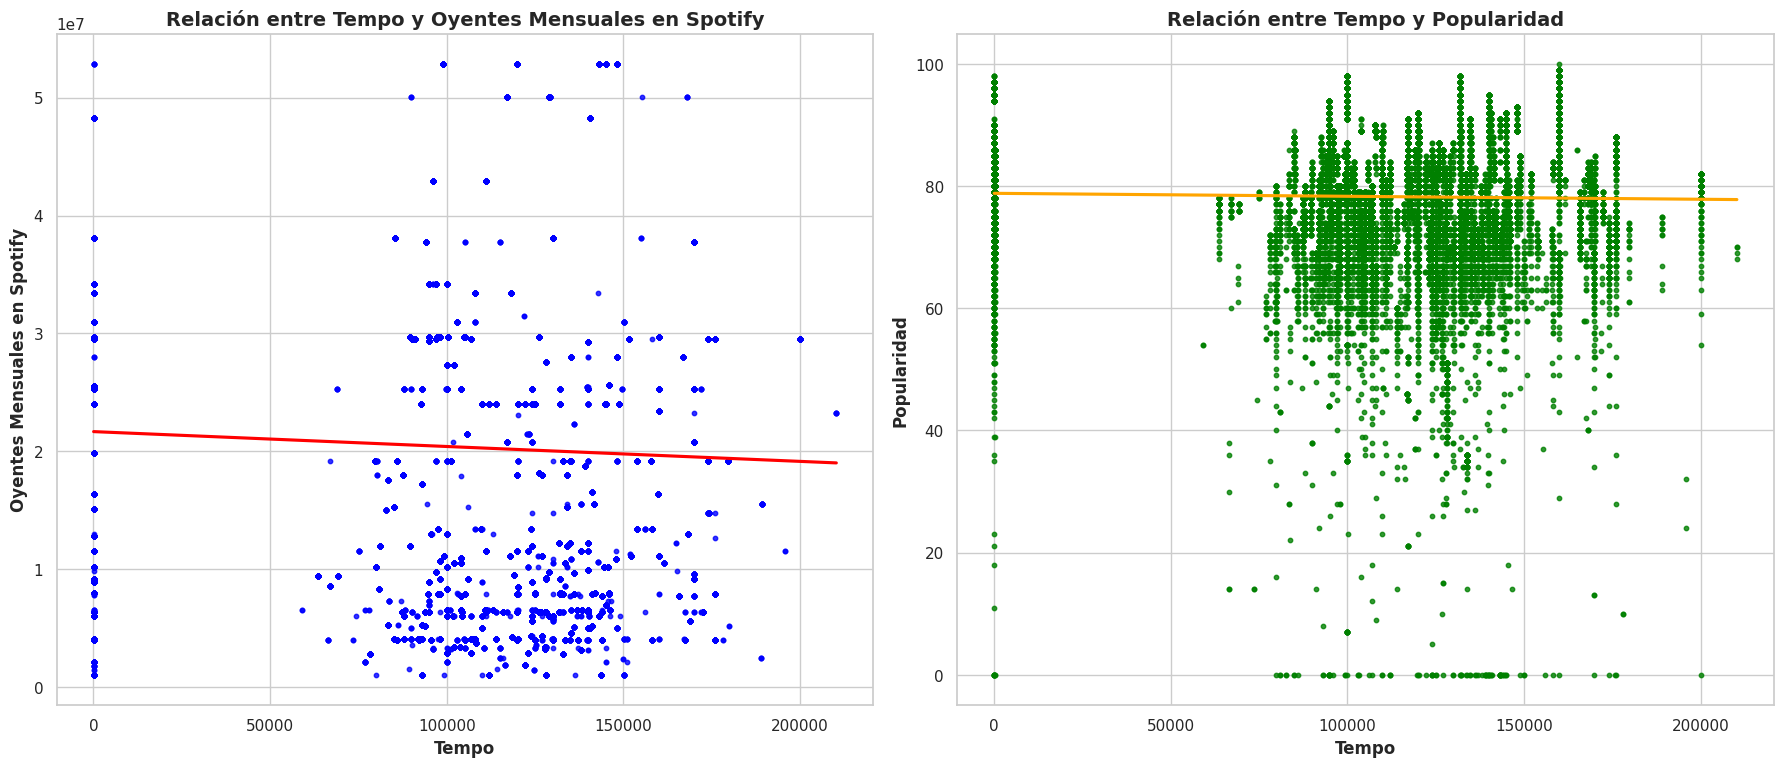


Generando gráficos de Duración vs Oyentes Mensuales en Spotify y Popularidad...


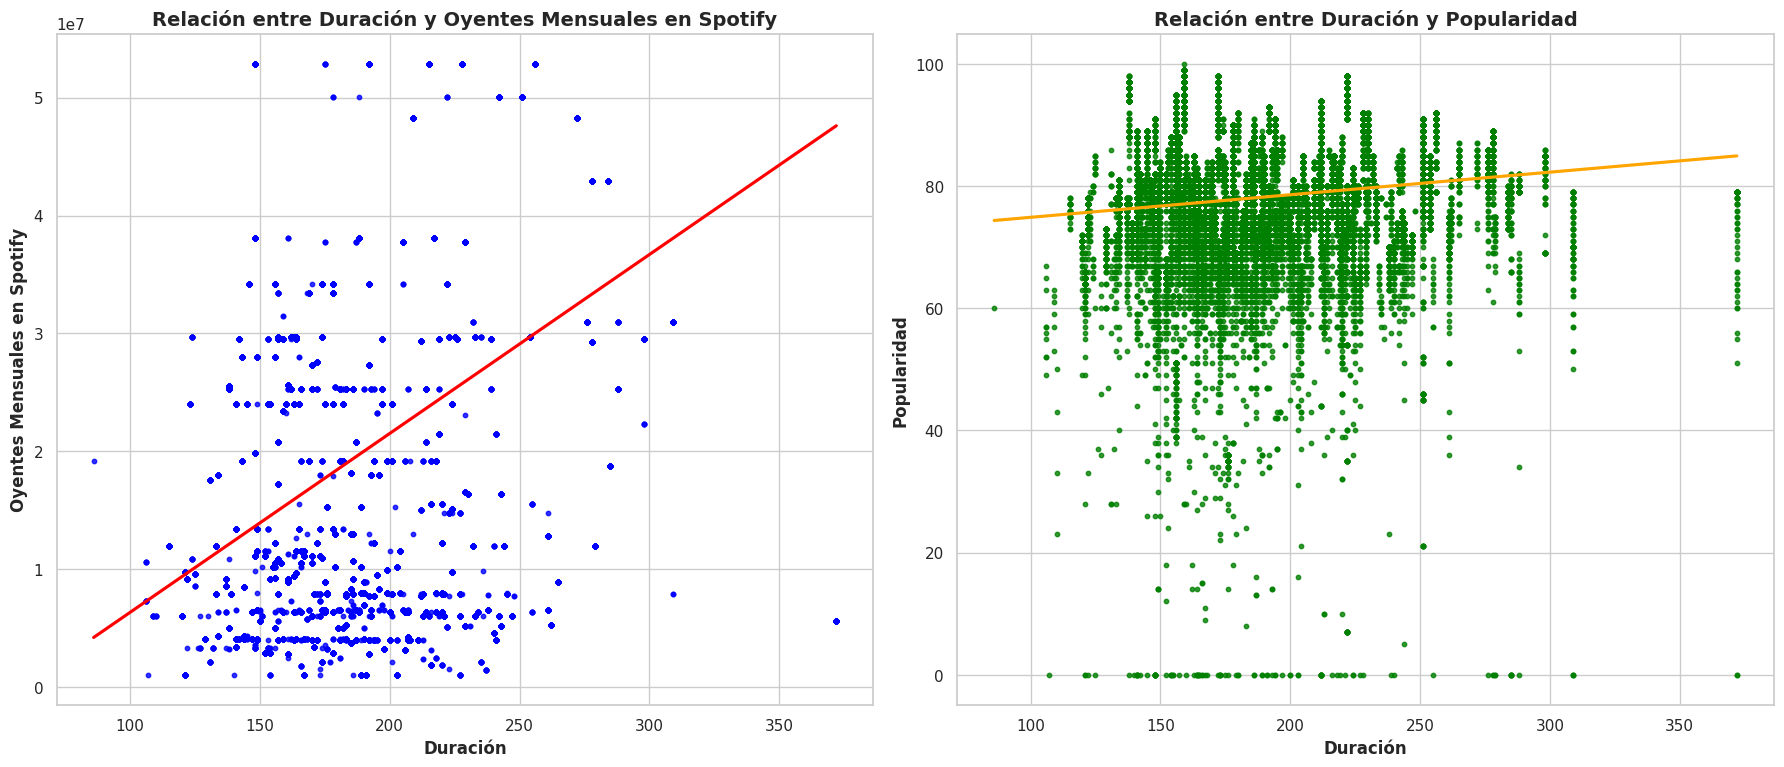

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")


def analizar_impacto_variable_lado_a_lado(variable, variable_nombre):
    """
    Analiza el impacto de una variable (ej. Bailabilidad, Energía) en Oyentes Mensuales y Popularidad.
    Muestra gráfico de dispersión y ajuste de línea de regresión en subplots lado a lado.
    """
    print(f"\nGenerando gráficos de {variable_nombre} vs Oyentes Mensuales en Spotify y Popularidad...")


    if variable in df_combinado.columns and 'Oyentes mensuales en Spotify' in df_combinado.columns and 'Popularidad' in df_combinado.columns:


        fig, axes = plt.subplots(1, 2, figsize=(18, 8))


        sns.regplot(x=variable, y='Oyentes mensuales en Spotify', data=df_combinado,
                    scatter_kws={'color':'blue', 's':10}, line_kws={'color':'red'}, ci=None, ax=axes[0])
        axes[0].set_title(f'Relación entre {variable_nombre} y Oyentes Mensuales en Spotify', fontsize=14, fontweight='bold')
        axes[0].set_xlabel(variable_nombre, fontsize=12, fontweight='bold')
        axes[0].set_ylabel('Oyentes Mensuales en Spotify', fontsize=12, fontweight='bold')


        sns.regplot(x=variable, y='Popularidad', data=df_combinado,
                    scatter_kws={'color':'green', 's':10}, line_kws={'color':'orange'}, ci=None, ax=axes[1])
        axes[1].set_title(f'Relación entre {variable_nombre} y Popularidad', fontsize=14, fontweight='bold')
        axes[1].set_xlabel(variable_nombre, fontsize=12, fontweight='bold')
        axes[1].set_ylabel('Popularidad', fontsize=12, fontweight='bold')


        plt.tight_layout()


        plt.show()


analizar_impacto_variable_lado_a_lado('Bailabilidad', 'Bailabilidad')


analizar_impacto_variable_lado_a_lado('Energía', 'Energía')


analizar_impacto_variable_lado_a_lado('Acústica', 'Acústica')


analizar_impacto_variable_lado_a_lado('Tono', 'Tono')


analizar_impacto_variable_lado_a_lado('Instrumentalidad', 'Instrumentalidad')


analizar_impacto_variable_lado_a_lado('Tempo', 'Tempo')


analizar_impacto_variable_lado_a_lado('Duración sg', 'Duración')


<ipython-input-46-9157acc1365b>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




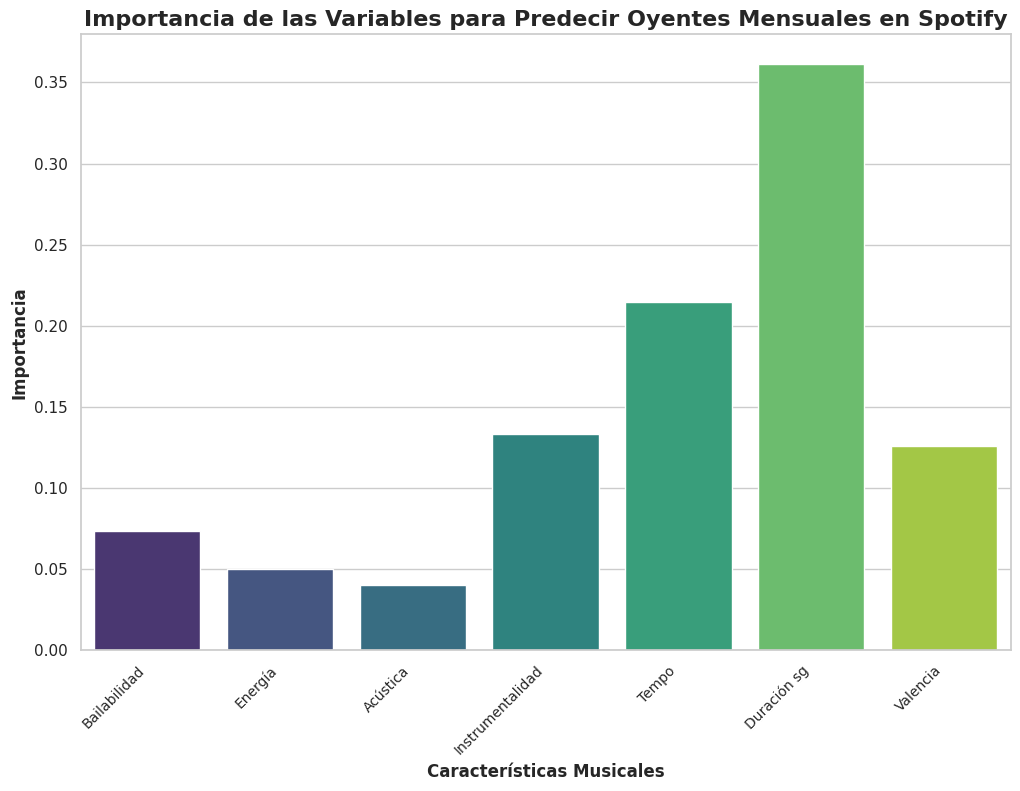

<ipython-input-46-9157acc1365b>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




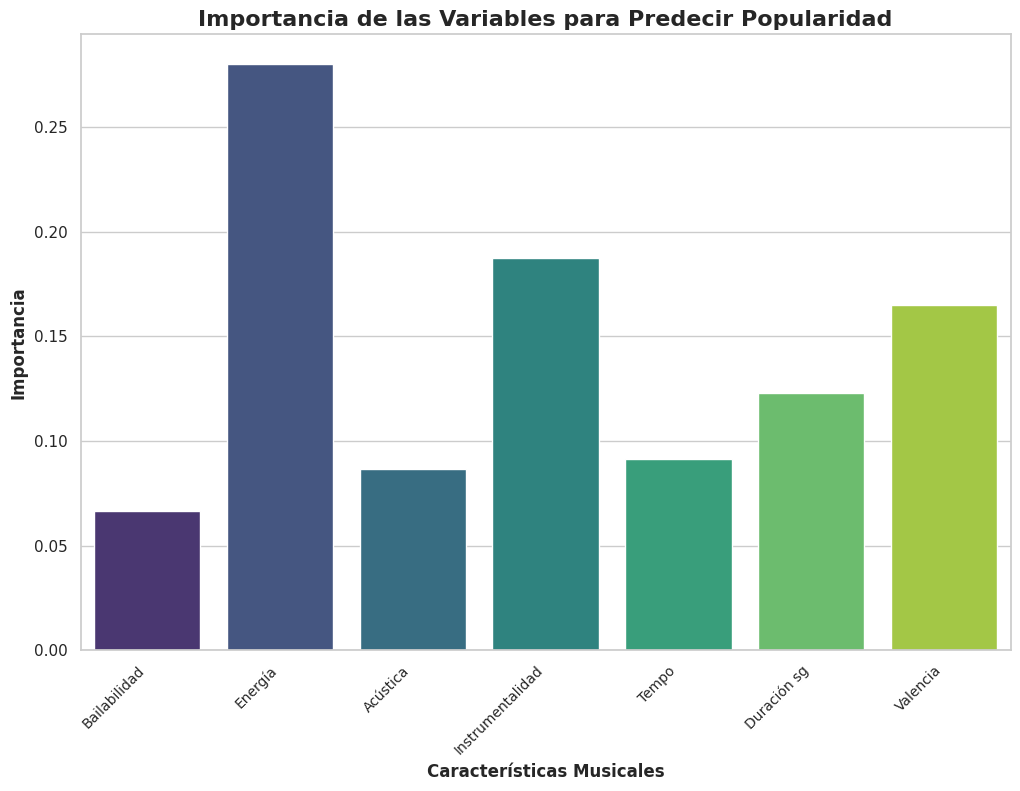

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def importancia_variables(modelo, X, y, variable_nombre):

    modelo.fit(X, y)


    importances = modelo.feature_importances_


    plt.figure(figsize=(12, 8))
    sns.barplot(x=X.columns, y=importances, palette='viridis')
    plt.title(f"Importancia de las Variables para Predecir {variable_nombre}", fontsize=16, fontweight='bold')
    plt.xlabel("Características Musicales", fontsize=12, fontweight='bold')
    plt.ylabel("Importancia", fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.show()


X = df_combinado[['Bailabilidad', 'Energía', 'Acústica', 'Instrumentalidad', 'Tempo', 'Duración sg', 'Valencia']]
y_spotify = df_combinado['Oyentes mensuales en Spotify']
y_popularidad = df_combinado['Popularidad']


modelo_spotify = RandomForestRegressor(n_estimators=100, random_state=42)


importancia_variables(modelo_spotify, X, y_spotify, "Oyentes Mensuales en Spotify")


modelo_popularidad = RandomForestRegressor(n_estimators=100, random_state=42)


importancia_variables(modelo_popularidad, X, y_popularidad, "Popularidad")



Generando matriz de correlación...


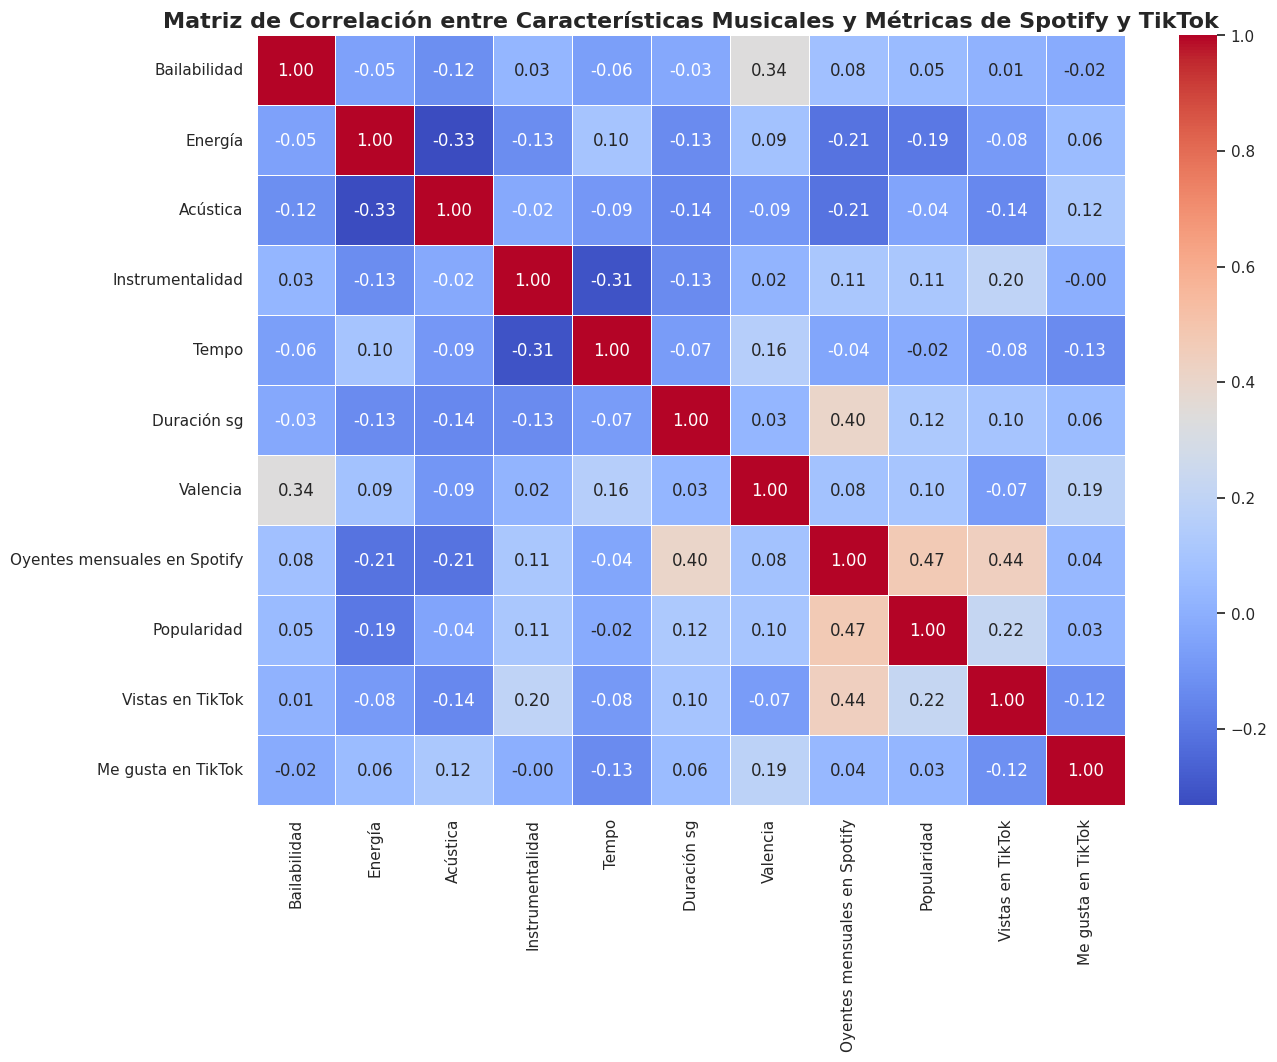

In [ ]:

def grafica_correlacion():
    print("\nGenerando matriz de correlación...")

    correlacion_df = df_combinado[['Bailabilidad', 'Energía', 'Acústica', 'Instrumentalidad', 'Tempo', 'Duración sg', 'Valencia',
                                   'Oyentes mensuales en Spotify', 'Popularidad', 'Vistas en TikTok', 'Me gusta en TikTok']]


    corr_matrix = correlacion_df.corr()


    plt.figure(figsize=(14, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 12})
    plt.title("Matriz de Correlación entre Características Musicales y Métricas de Spotify y TikTok", fontsize=16, fontweight='bold')
    plt.show()


grafica_correlacion()



Generando pairplot de variables musicales con respecto a Spotify y TikTok...


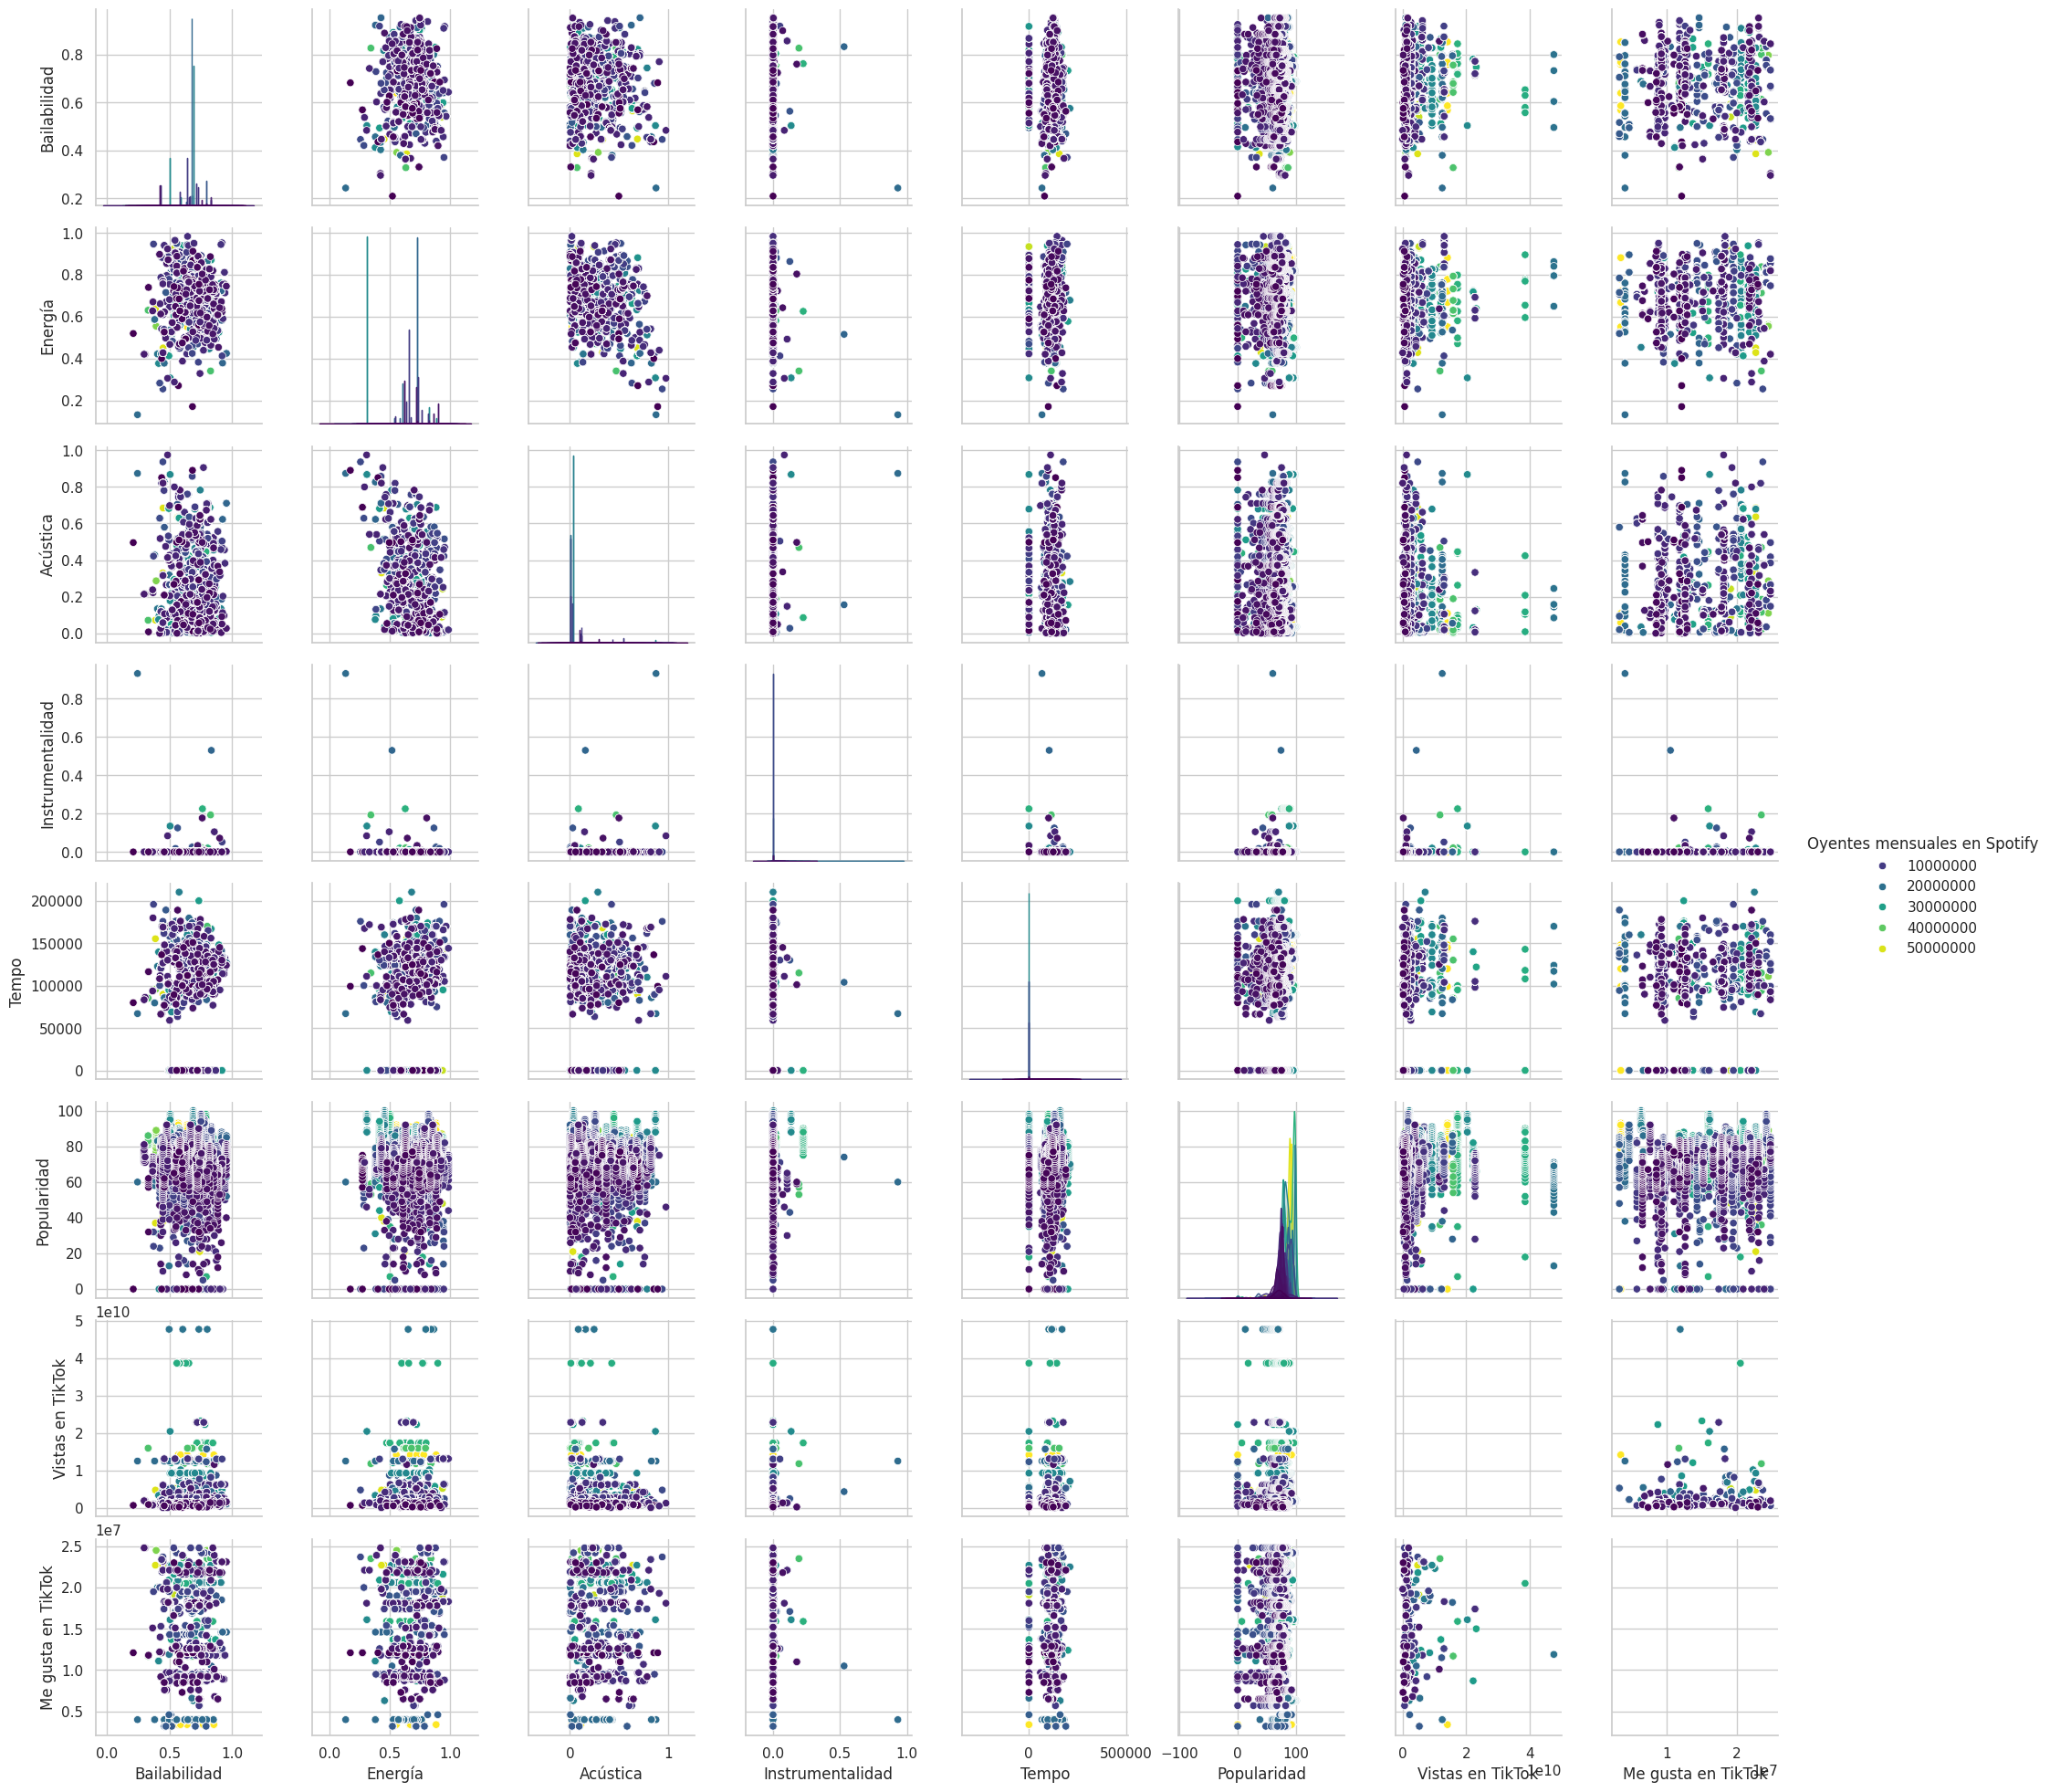

In [ ]:
def grafica_pairplot():
    print("\nGenerando pairplot de variables musicales con respecto a Spotify y TikTok...")


    pairplot_df = df_combinado[['Bailabilidad', 'Energía', 'Acústica', 'Instrumentalidad', 'Tempo', 'Oyentes mensuales en Spotify', 'Popularidad', 'Vistas en TikTok', 'Me gusta en TikTok']]


    sns.pairplot(pairplot_df, hue="Oyentes mensuales en Spotify", palette="viridis")


    plt.show()


grafica_pairplot()



Generando gráfico de Bailabilidad vs Vistas en TikTok...


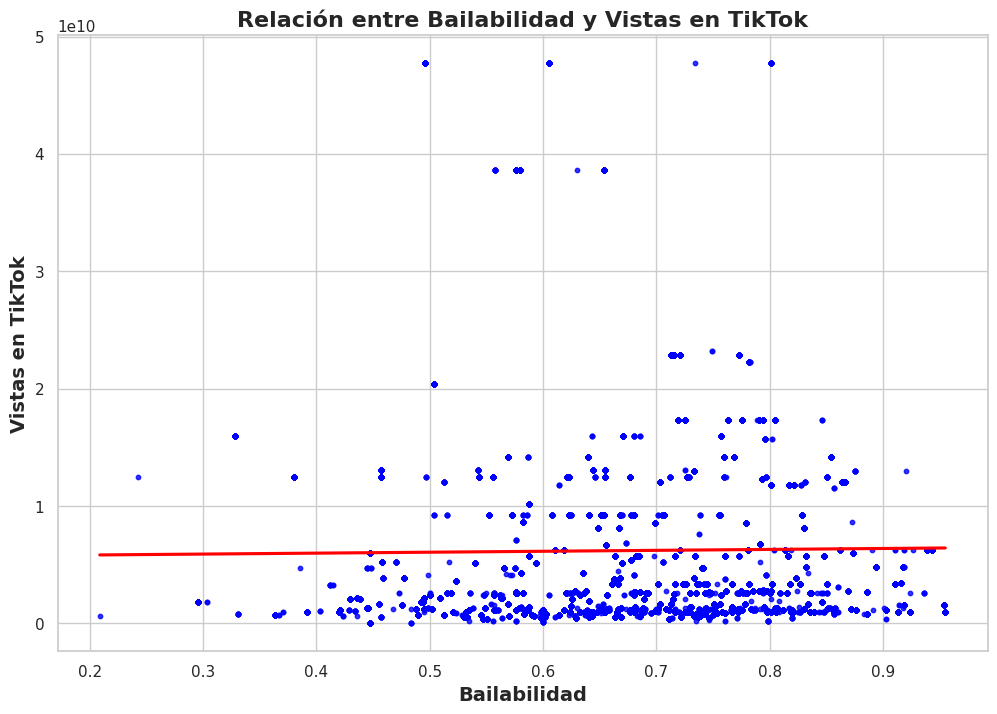


Generando gráfico de Energía vs Vistas en TikTok...


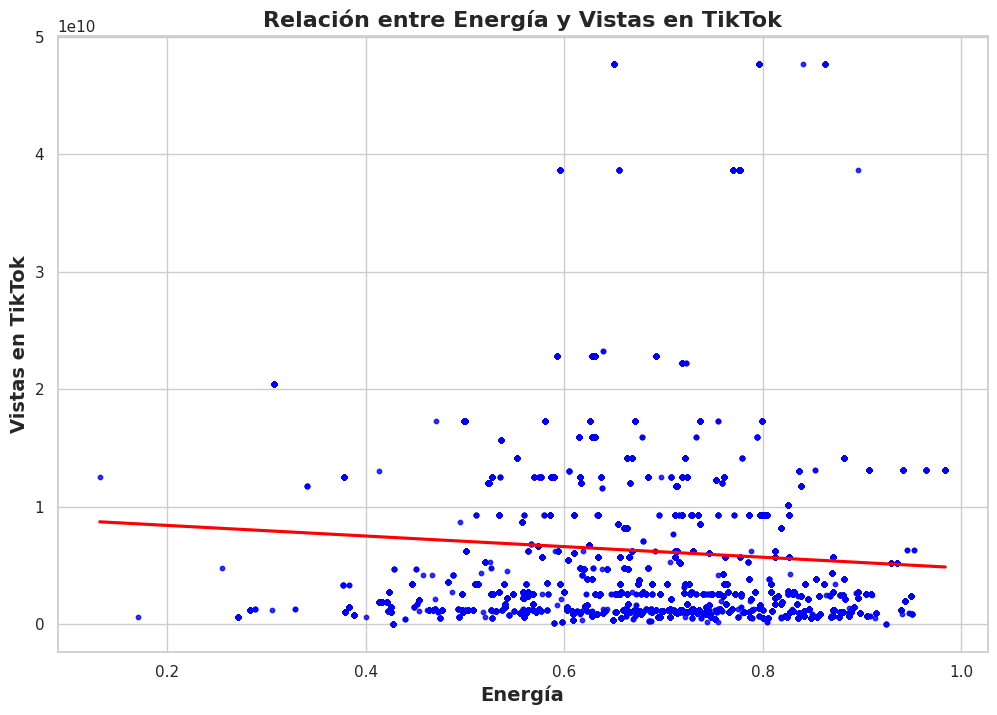


Generando gráfico de Acústica vs Vistas en TikTok...


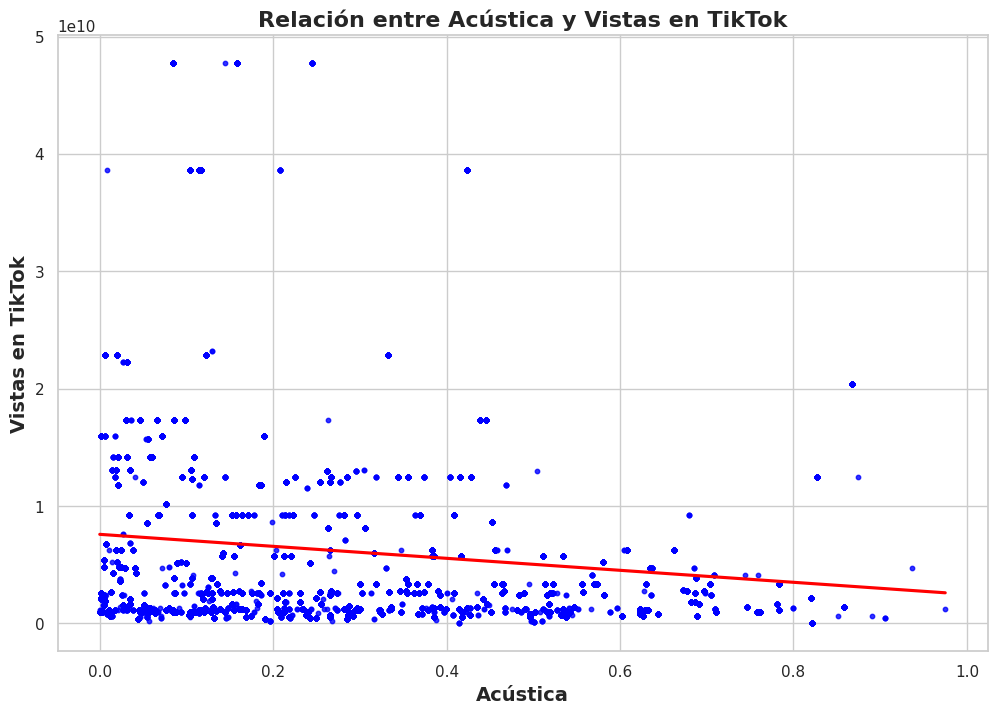

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")


def grafica_dispercion_vistas(variable, variable_nombre):
    print(f"\nGenerando gráfico de {variable_nombre} vs Vistas en TikTok...")

    if variable in df_combinado.columns and 'Vistas en TikTok' in df_combinado.columns:

        plt.figure(figsize=(12, 8))
        sns.regplot(x=variable, y='Vistas en TikTok', data=df_combinado, scatter_kws={'color':'blue', 's':10}, line_kws={'color':'red'}, ci=None)


        plt.title(f'Relación entre {variable_nombre} y Vistas en TikTok', fontsize=16, fontweight='bold')
        plt.xlabel(variable_nombre, fontsize=14, fontweight='bold')
        plt.ylabel('Vistas en TikTok', fontsize=14, fontweight='bold')


        plt.show()


grafica_dispercion_vistas('Bailabilidad', 'Bailabilidad')


grafica_dispercion_vistas('Energía', 'Energía')


grafica_dispercion_vistas('Acústica', 'Acústica')



Generando matriz de correlación entre las características musicales y métricas de TikTok...


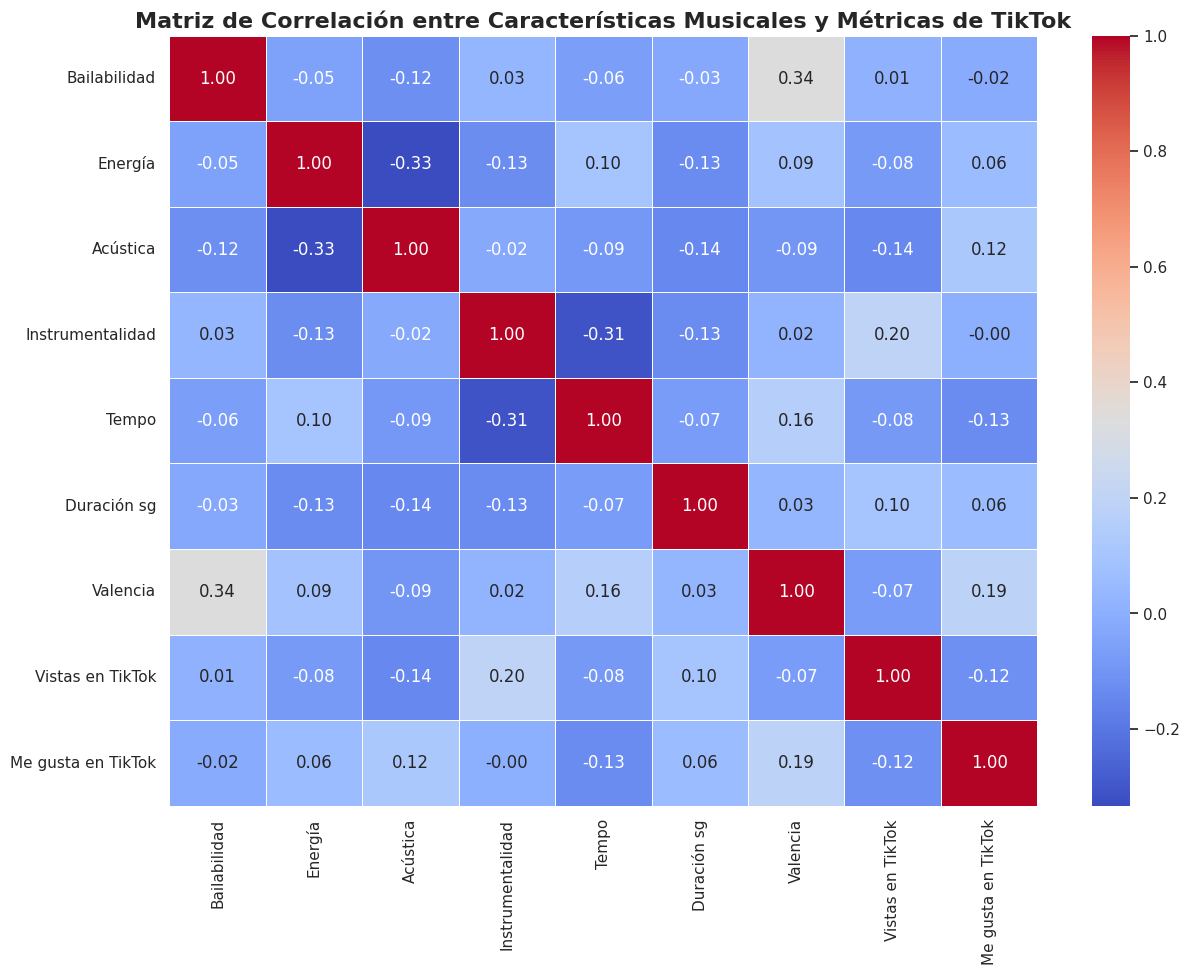

In [ ]:

def grafica_correlacion_tiktok():
    print("\nGenerando matriz de correlación entre las características musicales y métricas de TikTok...")

    correlacion_df = df_combinado[['Bailabilidad', 'Energía', 'Acústica', 'Instrumentalidad', 'Tempo', 'Duración sg', 'Valencia',
                                   'Vistas en TikTok', 'Me gusta en TikTok']]


    corr_matrix = correlacion_df.corr()


    plt.figure(figsize=(14, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 12})
    plt.title("Matriz de Correlación entre Características Musicales y Métricas de TikTok", fontsize=16, fontweight='bold')
    plt.show()


grafica_correlacion_tiktok()



Generando gráfico de Vistas en TikTok vs Oyentes Mensuales en Spotify para Artistas Emergentes y Populares...


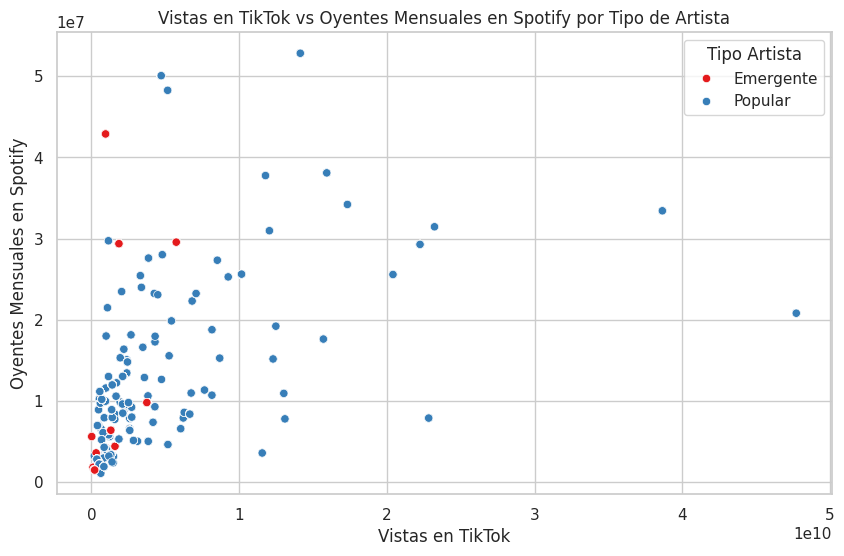

In [ ]:


def grafica_emergentes_vs_populares():
    print("\nGenerando gráfico de Vistas en TikTok vs Oyentes Mensuales en Spotify para Artistas Emergentes y Populares...")

    df_combinado['Tipo Artista'] = df_combinado['Seguidores en Spotify'].apply(lambda x: 'Popular' if x > 1050000 else 'Emergente')

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Vistas en TikTok', y='Oyentes mensuales en Spotify', hue='Tipo Artista', data=df_combinado, palette='Set1')
    plt.title("Vistas en TikTok vs Oyentes Mensuales en Spotify por Tipo de Artista")
    plt.xlabel("Vistas en TikTok")
    plt.ylabel("Oyentes Mensuales en Spotify")
    plt.show()

grafica_emergentes_vs_populares()


Generando gráfico de distribución por Región...


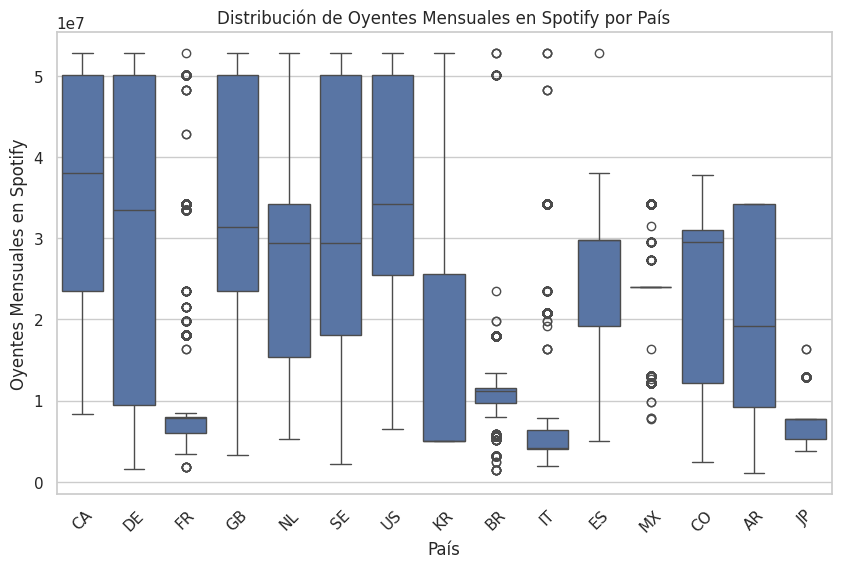

In [ ]:

def grafica_por_region():
    print("\nGenerando gráfico de distribución por Región...")

    if 'País_y' in df_combinado.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='País_y', y='Oyentes mensuales en Spotify', data=df_combinado)
        plt.title("Distribución de Oyentes Mensuales en Spotify por País")
        plt.xlabel("País")
        plt.ylabel("Oyentes Mensuales en Spotify")
        plt.xticks(rotation=45)
        plt.show()

grafica_por_region()



Generando gráfico de distribución por Región...


<ipython-input-29-922dc8b9ba15>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='País_y', y='Oyentes mensuales en Spotify', data=df_combinado,
<ipython-input-29-922dc8b9ba15>:13: UserWarning: 
The palette list has fewer values (10) than needed (15) and will cycle, which may produce an uninterpretable plot.
  box_plot = sns.boxplot(x='País_y', y='Oyentes mensuales en Spotify', data=df_combinado,


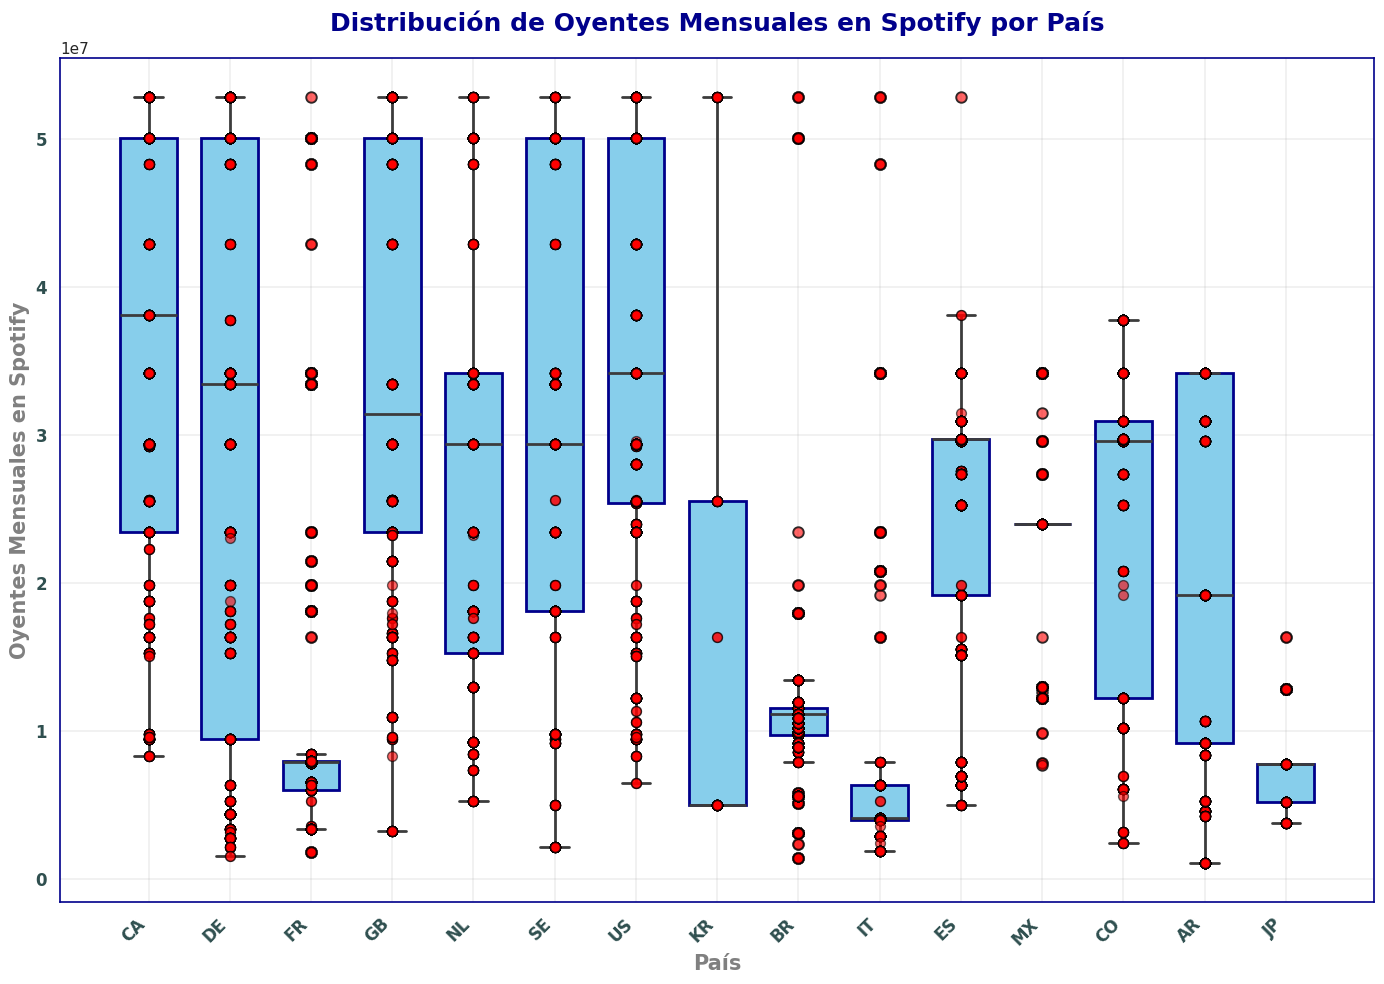

In [ ]:

def grafica_por_region():
    print("\nGenerando gráfico de distribución por Región...")


    plt.figure(figsize=(14, 10))
    sns.set(style="whitegrid")


    palette = sns.color_palette("muted")


    box_plot = sns.boxplot(x='País_y', y='Oyentes mensuales en Spotify', data=df_combinado,
                           palette=palette, width=0.7, fliersize=8, linewidth=2, boxprops=dict(facecolor='skyblue', edgecolor='darkblue'))


    plt.title("Distribución de Oyentes Mensuales en Spotify por País", fontsize=18, fontweight='bold', color='darkblue', pad=20)
    plt.xlabel("País", fontsize=15, fontweight='bold', color='gray')
    plt.ylabel("Oyentes Mensuales en Spotify", fontsize=15, fontweight='bold', color='gray')


    plt.scatter(df_combinado['País_y'], df_combinado['Oyentes mensuales en Spotify'], color='red', alpha=0.6, edgecolor='black', s=50, zorder=10)


    plt.grid(True, linestyle='-', linewidth=0.3, color='gray', alpha=0.5)


    plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold', color='darkslategray')
    plt.yticks(fontsize=12, fontweight='bold', color='darkslategray')


    for _, spine in box_plot.spines.items():
        spine.set_visible(True)
        spine.set_linewidth(1.2)
        spine.set_color('darkblue')


    plt.tight_layout()


    plt.show()


grafica_por_region()

In [ ]:
import plotly.express as px
import pandas as pd


def grafica_por_region_moderno():
    print("\nGenerando gráfico de distribución por Región con plotly...")


    df_combinado['País_y'] = df_combinado['País_y'].astype(str)


    fig = px.box(df_combinado,
                 x="País_y",
                 y="Oyentes mensuales en Spotify",
                 color="País_y",
                 title="Distribución de Oyentes Mensuales en Spotify por País",
                 boxmode="group",
                 labels={"Oyentes mensuales en Spotify": "Oyentes Mensuales en Spotify", "País_y": "País"},
                 category_orders={"País_y": df_combinado['País_y'].unique().tolist()},
                 color_discrete_sequence=px.colors.qualitative.Set2)


    fig.update_traces(marker=dict(size=8, line=dict(width=1, color='DarkSlateGrey')),
                      boxmean='sd',
                      jitter=0.1)


    fig.update_layout(
        title_font_size=22,
        title_font_family="Arial",
        title_font_color="DarkSlateBlue",
        title_x=0.5,
        xaxis_tickangle=-45,
        xaxis_title="País",
        yaxis_title="Oyentes Mensuales en Spotify",
        xaxis=dict(showgrid=False),
        yaxis=dict(showgrid=True, gridwidth=1, gridcolor='lightgray'),
        plot_bgcolor='rgba(0,0,0,0)',
        paper_bgcolor='whitesmoke',
        font=dict(family="Arial", size=12, color="Black"),
        showlegend=False
    )


    fig.show()


grafica_por_region_moderno()


Generando gráfico de distribución por Región con plotly...



Generando gráfico de importancia de las variables con Random Forest...


<ipython-input-35-01767469f4e7>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns, y=importancia, palette="rocket")


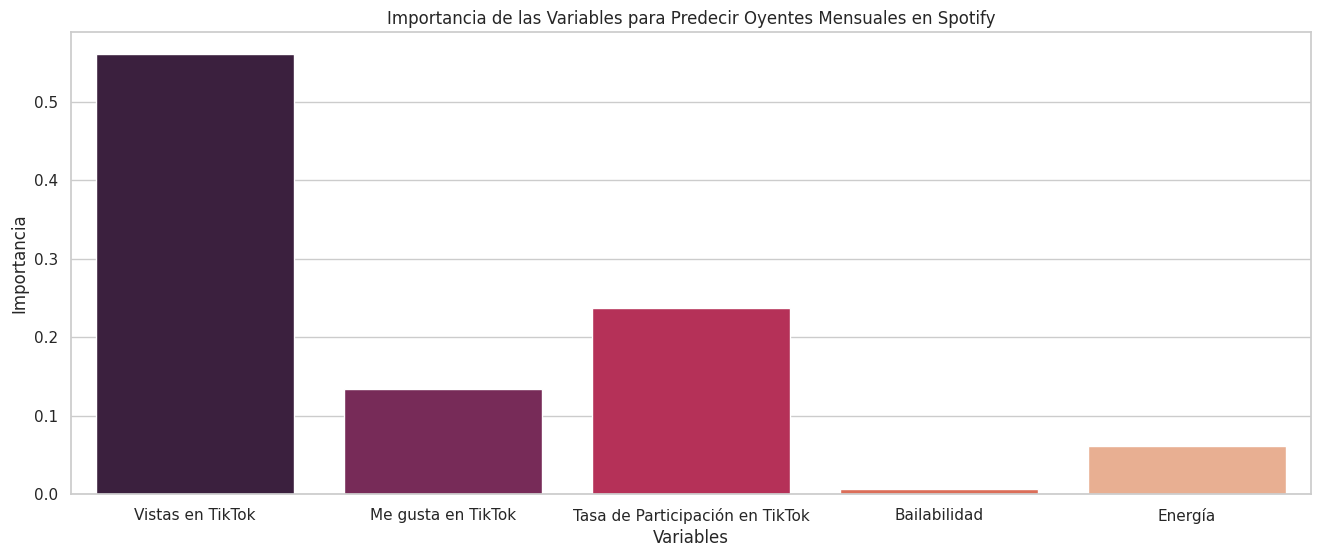

In [ ]:


def grafica_importancia_variables():
    print("\nGenerando gráfico de importancia de las variables con Random Forest...")

    from sklearn.ensemble import RandomForestRegressor


    X = df_combinado[['Vistas en TikTok', 'Me gusta en TikTok', 'Tasa de Participación en TikTok', 'Bailabilidad', 'Energía']]
    y = df_combinado['Oyentes mensuales en Spotify']


    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X, y)


    importancia = rf_model.feature_importances_


    plt.figure(figsize=(16, 6))
    sns.barplot(x=X.columns, y=importancia, palette="rocket")
    plt.title("Importancia de las Variables para Predecir Oyentes Mensuales en Spotify")
    plt.xlabel("Variables")
    plt.ylabel("Importancia")
    plt.show()


grafica_importancia_variables()


Generando gráfico de importancia de las variables con Random Forest...


<ipython-input-41-dfa5395ba812>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns, y=importancia, palette="coolwarm")


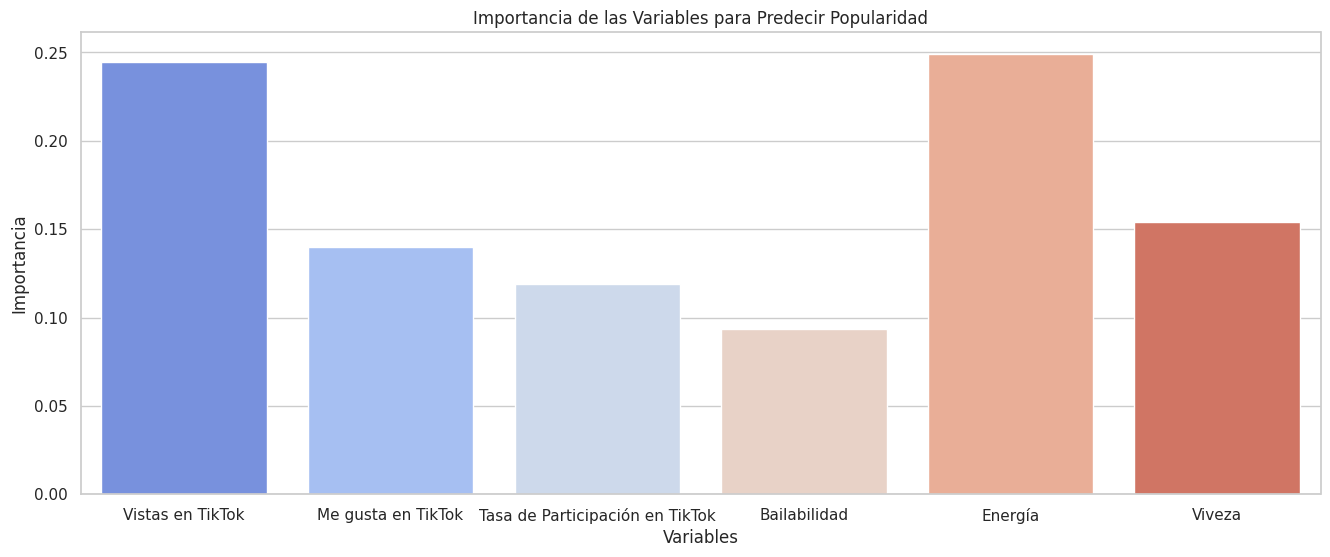

In [ ]:


def grafica_importancia_variables():
    print("\nGenerando gráfico de importancia de las variables con Random Forest...")

    from sklearn.ensemble import RandomForestRegressor


    X = df_combinado[['Vistas en TikTok', 'Me gusta en TikTok', 'Tasa de Participación en TikTok', 'Bailabilidad', 'Energía','Viveza']]
    y = df_combinado['Popularidad']


    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X, y)


    importancia = rf_model.feature_importances_


    plt.figure(figsize=(16, 6))
    sns.barplot(x=X.columns, y=importancia, palette="coolwarm")
    plt.title("Importancia de las Variables para Predecir Popularidad")
    plt.xlabel("Variables")
    plt.ylabel("Importancia")
    plt.show()


grafica_importancia_variables()

Géneros únicos: ['R&B' 'Hip-Hop/Rap' 'Rock' 'Indie Pop' 'Corridos' 'Reggaeton' 'Pop'
 'Chilean Hip-Hop' 'Afrobeats' 'Indie' 'UK Hip-Hop' 'Metal'
 'Argentine Hip-Hop' 'R&B/Soul' 'Chansons' 'Folk Pop' 'Trap Latino'
 'French Hip-Hop' 'Edm' 'Country' 'Dembow' 'Lofi' 'Brazilian Funk'
 'Sertanejo' 'Trap' 'Country Pop' 'House' 'Brazilian Hip-Hop' 'J-Pop'
 'Mexican Hip-Hop' 'Latin Hip-Hop' 'Pagode' 'Mpb' 'Brega Funk'
 'Soundtrack' 'Rkt' 'Italian Rap' 'Latin Pop' 'Emo' 'Forro' 'Latin Rock'
 'German Hip-Hop' 'Italian' 'Colombian Pop' 'Opm' 'Louvores']
Países únicos: ['CA' 'DE' 'FR' 'GB' 'NL' 'SE' 'US' 'KR' 'BR' 'IT' 'ES' 'MX' 'CO' 'AR'
 'JP']
  País_y           Género 1  Repeticiones
0     AR          Afrobeats           172
1     AR  Argentine Hip-Hop           288
2     AR    Chilean Hip-Hop           567
3     AR                Pop           394
4     AR          Reggaeton           206


<ipython-input-7-c8c7440a06ce>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Repeticiones', y='País_y', hue='Género 1', data=generos_por_pais, ci=None)


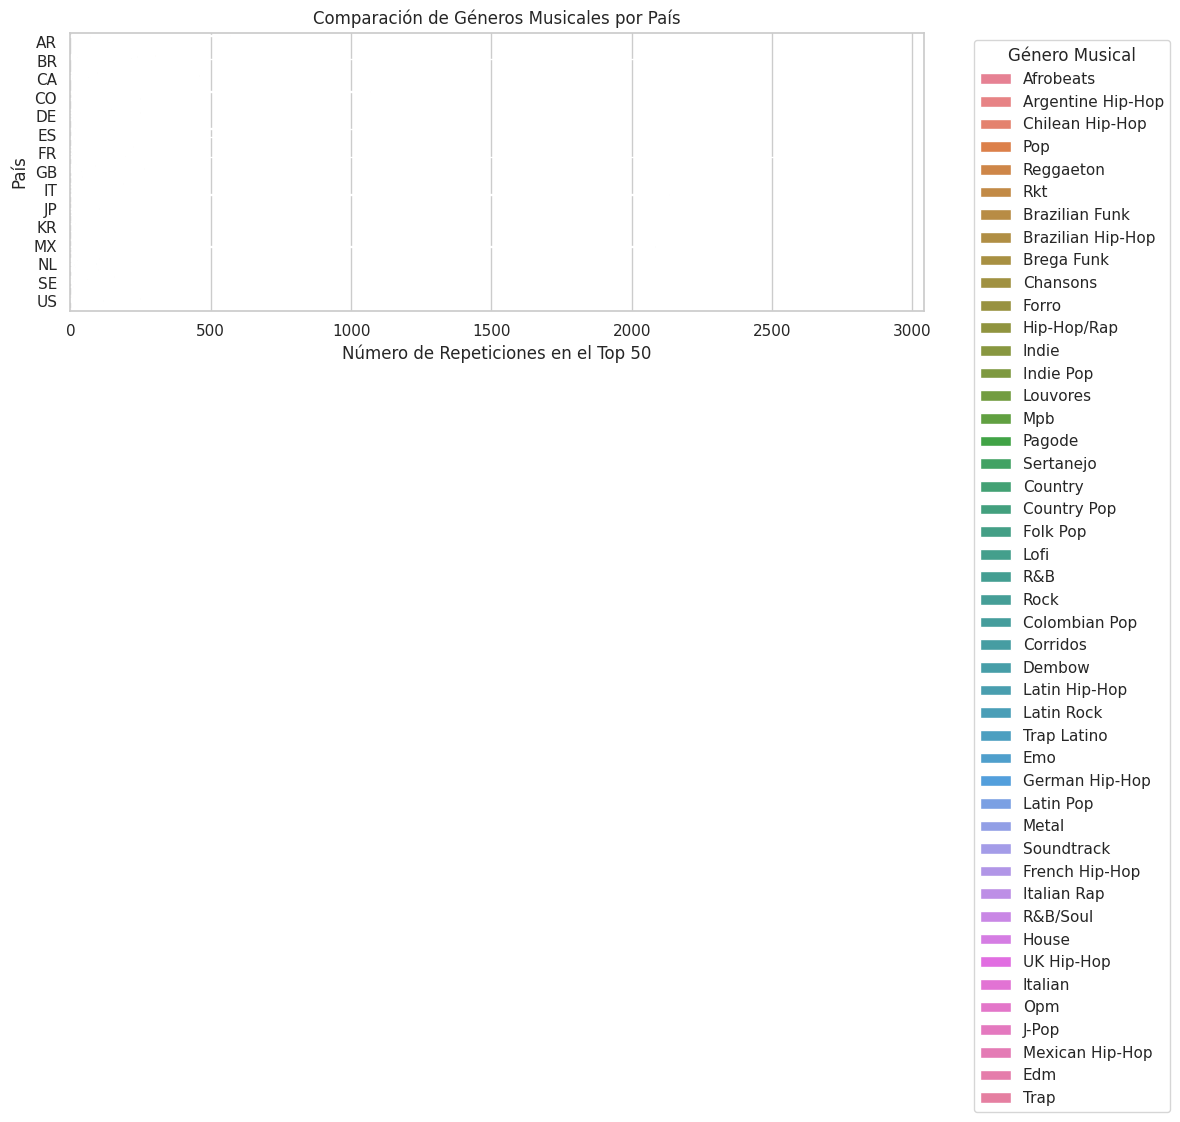

In [ ]:

print("Géneros únicos:", df_combinado['Género 1'].unique())
print("Países únicos:", df_combinado['País_y'].unique())


generos_por_pais = df_combinado.groupby(['País_y', 'Género 1']).size().reset_index(name='Repeticiones')


print(generos_por_pais.head())


plt.figure(figsize=(12, 8))
sns.barplot(x='Repeticiones', y='País_y', hue='Género 1', data=generos_por_pais, ci=None)


plt.title('Comparación de Géneros Musicales por País')
plt.xlabel('Número de Repeticiones en el Top 50')
plt.ylabel('País')
plt.legend(title='Género Musical', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


plt.show()